In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Aviation Accident Capstone
## *Part I: Data Cleaning*
Created by: Katy Christensen<br>
Created on: September 26, 2022 <br>
Created for: BrainStation Data Science Bootcamp Capstone<br>

Notebook 1 of 5<br>
Upcoming Notebook: *Part II: Pre-Processing Dummy Variables*

-----------
### Introduction
This is the first Jupyter Notebook of five that was used to pre-process, analyze and evaluate several supervised machine learning models used to predict whether an aviation accident is fatal. This is a binary classification accident and classsfication models are used to predict if an aviation acccident is fatal or not. 

###### Problem Statement:
> Over 90% of all aviation accidents and fatal aviation accident involve general aviation. Understanding the contributing factors that increase the likelihood of a fatal accident can help provide focused training and increased safety awareness to the aviation community.

### About the Data
This data is publically availabe from the National Transportation Safety Board (NTSB) website (https://data.ntsb.gov/avdata). This dataset covers all aviation accident from 1982 through the end 2007. While there is an additional dataset that encompasses 

### Overall Modeling Evaluation Method
Each notebook contains more in-depth descriptions and discussions about the various step or model, but in general the process to determine and select a supervised machine learning model is as follows:<br>
1. Find data
2. Pre-process data
    - Cleaning
    - Exploratory Data Analysis
    - Dummy Variable Encoding
3. Explore classification models: logistic regression K-nearest neighbor (KNN), and decision tree
4. Tune models
5. Model evaluation

### Cleaning Process
**Step 1.** The first step is to go over the general information. This include understanding the shape of the data, checking the overall nulls and dupliate values, and determine the types of data. </br>

**Step 2.** The dataset is examined for duplicate rows and then removed.</br>

**Step 3.** The percentage of nulls for each feature is reviewed and then dropped if there is 15% or more nulls. Given the number of features prior to any dummy encoding feature selection before and during the cleaning process is critical. If a reasonable justification could be way to impute the nulls even with 15% or more of the data missing, the feature was retained. For example, if only 'yes' values were entered then there could be an argument for assuming that all other rows were 'no' values. <br>
*Note: Unknown values in this dataset essentially equate to a null. If it was clear there were a number of unknowns or if nulls and unknowns were a majority of the feature values, the feature was dropped. If it was unclear, the nulls were imputed with unknown and a determination was made when features were encoded as dummy variables.* </br>

**Step 4.** After ensuring there are no more nulls, the final dataset shape was checked before exporting it as a CSV file. <br>
*Note: The export line is currently commented out, if you require the exported CSV file, please remove the `#` in front of the code line.*</br>

##### **Final Note:** While features were examined one at a time, this notebook was reorganized to improve readability. 
---

## Table of Contents
[1. Load Data & Review](#Step-1) <br>
- [Data Summary](#Overview) <br>
    - [Shape](#shape)<br>
    - [Duplicates] <br>
- [Duplicates](#duplicate-summary) <br>
- [Null Summary](#null-summary) </br>

[2. Initial Feature Selection](#Step-2) <br>
- [Drop Null Features](#drop-null) <br>
- [Drop Other Features](#drop-other) <br>

[3. Features & Unknowns](#Step-3) <br>
- [Aircraft Information Features](#acft-unk)<br>
- [Weather Information Features](#wx-unk)<br>
- [Crew Information Featues](#crew-unk)<br>

[4. Imputing Nulls](#Step-4)<br>
- [Dependent Variable: Accident Fatalaity](#dep-var)<br>
- [Aircraft Information Features](#acft-null)<br>
- [Event Information Features](#ev-null)<br>
- [Weather Information Features](#wx-null)<br>
- [Crew Information Features](#crew-null)<br>

[5. Feature Engineering](#Ste-5)<br>
[6. Summary](#Step-6)


----
<a id='Step-1'></a>
## 1. Load Data & Review
---
### Load CSV and display dataframe

In [2]:
ntsb08 = pd.read_csv('data/ntsb_08_final.csv')
ntsb08.head()

,ev_id,Aircraft_Key,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,...,crew_rat_endorse,seatbelts_used,shldr_harn_used,crew_tox_perf,seat_occ_pic,pc_profession,bfr,bfr_date,pilot_flying,total_hours
0,20001204X00000,1,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,...,U,Y,Y,N,LEFT,PCIV,Y,NaN,0.0,5350.0
1,20001204X00001,1,N,121,IFR,NaN,MINR,GRD,NONE,Boeing,...,Y,Y,Y,N,LEFT,PCIV,Y,NaN,0.0,23000.0
2,20001204X00002,1,N,135,CVFR,NaN,SUBS,NONE,NONE,Piper,...,U,Y,Y,N,LEFT,PCIV,Y,NaN,0.0,10000.0
3,20001204X00003,1,N,091,NONE,NaN,SUBS,NONE,NONE,Cessna,...,U,Y,U,N,LEFT,UNK,Y,NaN,0.0,450.0
4,20001204X00004,1,N,135,CVFR,NaN,SUBS,NONE,NONE,Cessna,...,U,Y,Y,N,LEFT,PCIV,Y,NaN,0.0,854.0


<a id='Overview'></a>
### Data Summary
This section reviews the overall summary data. The information provides a basic understanding of what the current status of the data is and provides a reference point to ensure the dataframe dimensions change as columns and rows are dropped. Typically a data dictionary is included, however given the number of features, feature descriptions are not consolidated in this notebook. A CSV data dictionary is available on the GitHub here. 
##### Shape: <a id='shape'></a>
The initial dataframe that was imported contains 137 features and 66,442 rows.

In [3]:
#check shape
ntsb08.shape

(66442, 137)

<a id='duplicate-summary'></a>
##### Duplicate Rows: 
Rows are considered duplicate when the row of data matches another. There are not duplicate rows in this dataset. 

In [4]:
#check for duplicates 
ntsb08.duplicated().sum()

0

<a id='null-summary'></a>
##### Null Summary: 
Looking at the initial results which shows the total number of sums by feature, there are a number of features with nulls within them. In fact, there are a total of almost 1.5 million null values within the data which equates to 16% of the data and is not even including unknowns. 

In [5]:
#check total nulls by feature
ntsb08.isna().sum()

ev_id                 0
Aircraft_Key          0
acft_missing      16314
far_part             37
flt_plan_filed      369
                  ...  
pc_profession      3420
bfr               16631
bfr_date          56504
pilot_flying        395
total_hours        4271
Length: 137, dtype: int64

In [6]:
#check total nulls in dataset
ntsb08.isna().sum().sum()

1493788

In [7]:
#calculate total percentage of nulls
ntsb08.isna().sum().sum()/(ntsb08.shape[0] * ntsb08.shape[1])*100

16.410646945901117

---
<a id='Step-2'></a>
## 2. Initial Feature Selection
---
As mentioned previously, this notebook is reorganized to improve the flow and readibility. This section consolidates efforts on features dropped to improve dimensionality or lack of clear relevance to the problem statement. For example, `ev_id`, `Aircraft_key`, and `crew_no` are unique identifiers that were imported from mySQL results and provide information from a tabular perspective, but unnecessary analytically. 
<a id='drop-nulls'></a>
#### (A) Drop nulls if feature is 15% or more nulls (unknowns were dealt with separately) 
1. Create a separate dataframe with the features and the percentage of nulls
2. Locate columns where the `pct` columns is greter

In [8]:
col_drop = pd.DataFrame(ntsb08.isna().sum()/ntsb08.shape[0]*100)
col_drop = col_drop.rename(columns={col_drop.columns[0]: 'pct'})
col_drop.head(2)

,pct
ev_id,0.0
Aircraft_Key,0.0


In [9]:
col_drop.loc[col_drop['pct'] >= 15]

,pct
acft_missing,24.553746
flight_plan_activated,78.751392
acft_series,24.845730
fixed_retractable,66.694260
date_last_insp,28.247193
afm_hrs_last_insp,30.364829
afm_hrs,25.941423
oprtng_cert,25.033864
oper_cert,24.698233
oper_sched,83.998074


In [10]:
ntsb08 = ntsb08.drop(['acft_series', 'fixed_retractable',
                      'date_last_insp', 'afm_hrs_last_insp', 'afm_hrs', 'oprtng_cert', 'oper_cert', 
                      'oper_sched', 'dest_same_local', 'report_to_icao', 'evacuation', 'afm_hrs_since',
                      'rwy_len', 'rwy_width', 'med_type_flight', 'apt_dist', 'apt_dir', 'apt_elev', 
                      'sky_nonceil_ht', 'sky_ceil_ht', 'vis_rvr', 'vis_rvv', 'wx_dew_pt', 'gust_kts', 
                      'altimeter', 'wx_dens_alt', 'wx_int_precip', 'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd',
                      'inj_tot_f', 'inj_tot_m', 'inj_tot_n', 'inj_tot_s', 'inj_tot_t', 'crew_res_country',
                      'bfr', 'bfr_date'], axis=1)
ntsb08.shape

(66442, 99)

After dropping features containing 15% or more nulls, the features in the dataset is reduced from 137 to 99 features. The remaining features with nulls can be pulled into a list and printed for review. 

In [11]:
#Create a list to determine which remaining features contain null values
nullfeatures = list(ntsb08.columns[ntsb08.isnull().any()])
print(nullfeatures, '\n')
print('Number of features containing nulls:', len(nullfeatures))

['acft_missing', 'far_part', 'flt_plan_filed', 'flight_plan_activated', 'acft_fire', 'acft_expl', 'acft_make', 'acft_model', 'acft_serial_no', 'cert_max_gr_wt', 'acft_category', 'acft_reg_cls', 'homebuilt', 'total_seats', 'num_eng', 'type_last_insp', 'elt_install', 'elt_oper', 'elt_aided_loc_ev', 'certs_held', 'type_fly', 'second_pilot', 'dprt_pt_same_ev', 'dprt_apt_id', 'dprt_city', 'dprt_state', 'dprt_country', 'dprt_time', 'dprt_timezn', 'dest_apt_id', 'dest_city', 'dest_state', 'dest_country', 'phase_flt_spec', 'rwy_num', 'site_seeing', 'air_medical', 'ev_time', 'ev_tmzn', 'ev_city', 'ev_state', 'ev_country', 'ev_site_zipcode', 'mid_air', 'on_ground_collision', 'latitude', 'longitude', 'ev_nr_apt_id', 'ev_nr_apt_loc', 'wx_brief_comp', 'wx_src_iic', 'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id', 'wx_obs_elev', 'wx_obs_dist', 'wx_obs_tmzn', 'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp', 'wind_dir_deg', 'wind_dir_ind', 'wind_vel_kts', 'wind_vel_ind', 'gust_ind'

<a id='drop-other'></a>
#### (B) Drop Features:
- Dropped because the features are keys
 `ev_id`, `Aircraft_Key`, `crew_no`
- Dropped because the features were too specific and other features covered similar information at a broader level (i.e. city information is specific, but state and country features were retained)
 `ev_city`, `ev_site_zipcode`, `dest_city`, `dprt_city`, `dprt_time`, `dprt_timezn`, `crew_city`,   `acft_series`, `acft_serial_no`, `dprt_apt_id`, `dest_apt_id`, `ev_nr_apt_id`, `dprt_pt_same_ev`, `dest_same_local`, `latitude`, `longitude`, 
- Dropped as the features were overly specific to information on how the weather was collected
`wx_src_iic`, `wx_obs_time`, `wx_obs_dir`,`wx_obs_fac_id`, `wx_obs_elev`, `wx_obs_dist`, `wx_obs_tmzn`
- Dropped as the feature was discontinued after 2006
`act_reg_cls`

In [12]:
ntsb08 = ntsb08.drop(['ev_id', 'Aircraft_Key', 'crew_no', 'ev_city', 'ev_site_zipcode', 'dest_city', 
                      'dprt_city', 'crew_city', 'acft_serial_no', 'acft_reg_cls', 'dprt_apt_id', 
                      'dest_apt_id', 'ev_nr_apt_id', 'dprt_pt_same_ev', 'dprt_time', 'dprt_timezn', 
                      'latitude', 'longitude', 'wx_src_iic', 'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id',
                      'wx_obs_elev', 'wx_obs_dist', 'wx_obs_tmzn'], axis=1)
ntsb08.shape

(66442, 74)

After dropping the additional features, the features in the dataset is reduced even further to 74 features. The updated remaining features with nulls can be pulled into a list and printed for review. 

In [13]:
#Create a list to determine which features contain null values
nullfeatures = list(ntsb08.columns[ntsb08.isnull().any()])
print(nullfeatures, '\n')
print('Number of features containing nulls:', len(nullfeatures))

['acft_missing', 'far_part', 'flt_plan_filed', 'flight_plan_activated', 'acft_fire', 'acft_expl', 'acft_make', 'acft_model', 'cert_max_gr_wt', 'acft_category', 'homebuilt', 'total_seats', 'num_eng', 'type_last_insp', 'elt_install', 'elt_oper', 'elt_aided_loc_ev', 'certs_held', 'type_fly', 'second_pilot', 'dprt_state', 'dprt_country', 'dest_state', 'dest_country', 'phase_flt_spec', 'rwy_num', 'site_seeing', 'air_medical', 'ev_time', 'ev_tmzn', 'ev_state', 'ev_country', 'mid_air', 'on_ground_collision', 'ev_nr_apt_loc', 'wx_brief_comp', 'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp', 'wind_dir_deg', 'wind_dir_ind', 'wind_vel_kts', 'wind_vel_ind', 'gust_ind', 'ev_highest_injury', 'wx_cond_basic', 'crew_category', 'crew_age', 'crew_sex', 'crew_res_state', 'med_certf', 'med_crtf_vldty', 'date_lst_med', 'crew_rat_endorse', 'seatbelts_used', 'shldr_harn_used', 'crew_tox_perf', 'seat_occ_pic', 'pc_profession', 'pilot_flying', 'total_hours'] 

Number of features containi

**Comment:** By dropping the nulls and increasing selectivity of features, only 63 features require further analysis. 

---
<a id='Step-3'></a>
## 3. Features & Unknowns
---
Unknowns were represented by various values, such as 'UNK' vs 'U'. In addition the use of spaces was inconsistent and required going through each feature. Features that contained too many unknowns(threshold around 15%+) to provide analytic benefit were dropped and are consolidated into this section. 

Features are characterized by the information they are relevant to (i.e. Aircraft, Weather, etc.) The features consolidated in this section are as follows:
- [Aircraft Information Features](#acft-unk)
    - Type of Last Inspection 
- [Weather Information](#wx-unk)
    - Weather Brief
    - Wind Direction Indicator
    - Wind Velocity Indicator
    - Gust Indicator
- [Crew Information](#crew-unk)<br>
    - Crew Rating Endorsement
    - Shoulder Harness Used
    - Profession of PIC
    - Pilot flying
---
<a id='acft-unk'></a>
#### Aircraft Information Features
##### Type of Last Inspection | `type_last_insp`

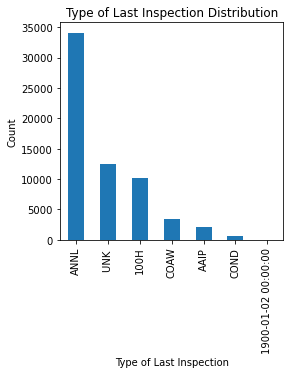

Total Rows w/ Nulls: 3541
Percent Nulls: 5.329460281147467
Percent Unknown: 18.715571475873695


In [14]:
plt.figure(figsize=(4, 4))
ntsb08['type_last_insp'].value_counts().plot(kind='bar')

#plot and label my graph
plt.title('Type of Last Inspection Distribution')
plt.xlabel('Type of Last Inspection')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['type_last_insp'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['type_last_insp'].isna().sum()/ntsb08.shape[0]*100)
print('Percent Unknown:', ntsb08['type_last_insp'].str.count('UNK').sum()/ntsb08.shape[0]*100)

**Comment:** The nulls and unknowns account for over 20% of the data; this feature will be dropped.

In [15]:
ntsb08 = ntsb08.drop(['type_last_insp'], axis=1)

<a id='wx-unk'></a>
#### Weather Information Features
##### Weather Brief | `wx_brief_comp`
Type of weather briefing(s) obtained by flight crew

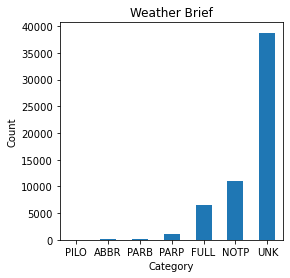

Total Rows w/ Nulls: 8798
Percent Nulls: 13.241624273802715


In [16]:
plt.figure(figsize=(4, 4))
ntsb08['wx_brief_comp'].value_counts().sort_values().plot(kind='bar')

plt.title('Weather Brief')
plt.xlabel('Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wx_brief_comp'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wx_brief_comp'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Most of the values in this feature are unknown and will be dropped. 

In [17]:
ntsb08 = ntsb08.drop(['wx_brief_comp'], axis=1)

##### Wind Direction Indicator | `wind_dir_ind`
This feature indicates whether or not winds were variable. Wind direction may be considered variable if, during the 2-minute evaluation period, the speed is 6 knots or less. Direction may be considered variable if over the 2-minute evaluation period it varies by 60 degrees or more.

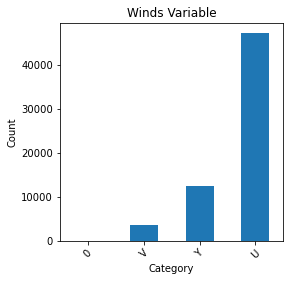

Total Rows w/ Nulls: 3355
Percent Nulls: 5.049516871858161


In [18]:
plt.figure(figsize=(4, 4))
ntsb08['wind_dir_ind'].value_counts().sort_values().plot(kind='bar')

plt.title('Winds Variable')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wind_dir_ind'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wind_dir_ind'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Only 3.7% of the data is nulls but there are also a significant number of unknown values in the data. This feature will be dropped.

In [19]:
ntsb08 = ntsb08.drop(['wind_dir_ind'], axis=1)

##### Wind Velocity Indicator | `wind_vel_ind`
This feature indicates the type of wind conditions

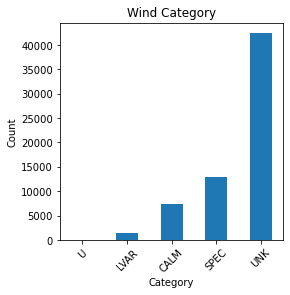

Total Rows w/ Nulls: 2227
Percent Nulls: 3.3517955510068935


In [20]:
plt.figure(figsize=(4, 4))
ntsb08['wind_vel_ind'].value_counts().sort_values().plot(kind='bar')

plt.title('Wind Category')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wind_vel_ind'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wind_vel_ind'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Only 2% of the data is nulls but there are also a significant number of unknown values in the data. This feature will be dropped.

In [21]:
ntsb08 = ntsb08.drop(['wind_vel_ind'], axis=1)

##### Gust Indicator | `gust_ind`
This feature indicates whether or not there were wind gusts at the time of the event

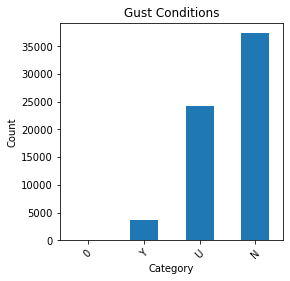

Total Rows w/ Nulls: 1183
Percent Nulls: 1.7805002859636976


In [22]:
plt.figure(figsize=(4, 4))
ntsb08['gust_ind'].value_counts().sort_values().plot(kind='bar')

plt.title('Gust Conditions')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['gust_ind'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['gust_ind'].isna().sum()/ntsb08.shape[0]*100)

In [23]:
ntsb08['gust_ind'].value_counts()/len(ntsb08['gust_ind'])*100

N    56.193372
U    36.529605
Y     5.495018
0     0.001505
Name: gust_ind, dtype: float64

**Comment:** 0.12% of the data is null and 36.3% of the data is categorized as unknown gust conditions. This feature will be dropped. 

In [24]:
ntsb08 = ntsb08.drop(['gust_ind'], axis=1)

<a id='crew-unk'></a>
#### Crew Information Features
##### Crew Rating Endoresement | `crew_rat_endorse`
Indicates if the crew members held the appropriate type rating or endorsement for the accident aircraft

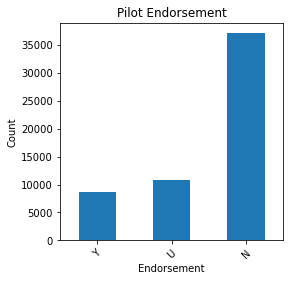

Total Rows w/ Nulls: 9865
Percent Nulls: 14.847536196983835
Percent Unknown: 16.2201619457572


In [25]:
plt.figure(figsize=(4, 4))
ntsb08['crew_rat_endorse'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Pilot Endorsement')
plt.xlabel('Endorsement')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['crew_rat_endorse'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['crew_rat_endorse'].isna().sum()/ntsb08.shape[0]*100)
#Find percentage of unknowns within the column
print('Percent Unknown:', ntsb08['crew_rat_endorse'].str.count('U').sum()/ntsb08.shape[0]*100)

**Comment:** Looking at the percentage of nulls and unknowns account for 29% of the feature data. The feature will be dropped from the analysis. 

In [26]:
ntsb08 = ntsb08.drop(['crew_rat_endorse'], axis=1)

##### Shoulder Harness Used | `shldr_harn_used`
If seatbelts were worn, indicates if a shoulder harness was also in use

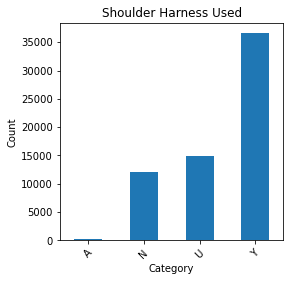

Total Rows w/ Nulls: 2569
Percent Nulls: 3.8665302067969054
Percent Unknown: 22.389452454772584


In [27]:
plt.figure(figsize=(4, 4))
ntsb08['shldr_harn_used'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Shoulder Harness Used')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['shldr_harn_used'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['shldr_harn_used'].isna().sum()/ntsb08.shape[0]*100)
#Find percentage of unknowns within the column
print('Percent Unknown:', ntsb08['shldr_harn_used'].str.count('U').sum()/ntsb08.shape[0]*100)

**Comment:** Although there are only 2% nulls, 20% of the data is unknown; this feature will be dropped.

In [28]:
ntsb08 = ntsb08.drop(['shldr_harn_used'], axis=1)

##### Profession of PIC | `pc_profession`
Profession category matching the PIC's primary profession.

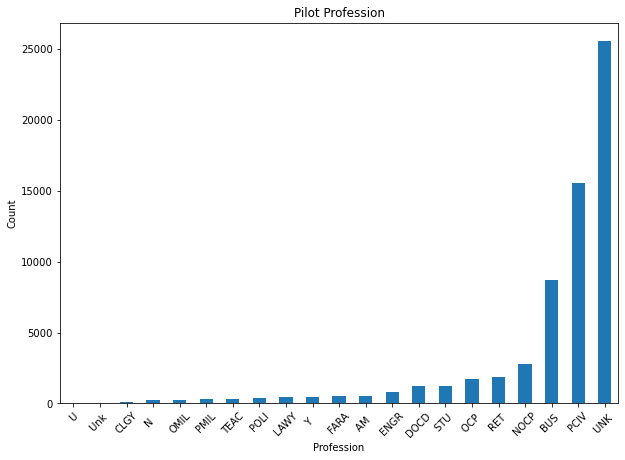

In [29]:
plt.figure(figsize=(10, 7))
ntsb08['pc_profession'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Pilot Profession')
plt.xlabel('Profession')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

In [30]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['pc_profession'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['pc_profession'].isna().sum()/ntsb08.shape[0]*100)
#Find percentage of unknowns within the column
print('Percent Unknown:', ntsb08['pc_profession'].str.count('UNK').sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 3420
Percent Nulls: 5.147346557900123
Percent Unknown: 38.45910719123446


**Comment:** The unknown category makes up over 37% of the feature data; this feature will be dropped.

In [31]:
ntsb08 = ntsb08.drop(['pc_profession'], axis=1)

##### Pilot Flying | `pilot_flying`
No description provided

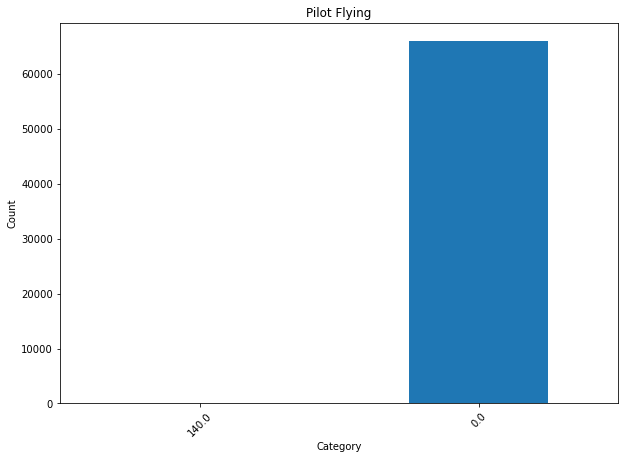

In [32]:
plt.figure(figsize=(10, 7))
ntsb08['pilot_flying'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Pilot Flying')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

**Comment:** It is unclear what this feature is and is not described in the data dictionary. This feature will be dropped.

In [33]:
ntsb08 = ntsb08.drop(['pilot_flying'], axis=1)

---
<a id='Step-4'></a>
## 4. Imputing Nulls
---
<a id='dep-var'></a>
#### Dependent Variable: Fatal Accident | `ev_hightest_injury` 
This feature will be used as the dependent variable (y) and later binarized to indicate whether or not an accident was fatal. The feature as it is indicates the most severe category of injury.

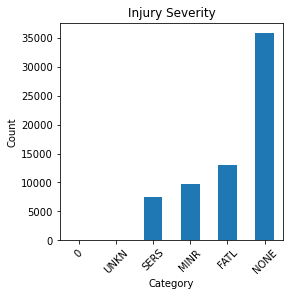

Total Rows w/ Nulls: 250
Percent Nulls: 0.3762680232383131


In [34]:
plt.figure(figsize=(4, 4))
ntsb08['ev_highest_injury'].value_counts().sort_values().plot(kind='bar')

plt.title('Injury Severity')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['ev_highest_injury'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['ev_highest_injury'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Less than 0.05% of the data in the column is null. These rows will be imputed with 'NONE'. 

In [35]:
#Impute nulls
ntsb08['ev_highest_injury'] = ntsb08['ev_highest_injury'].fillna('NONE')
#Verify there are no remaining nulls
ntsb08['ev_highest_injury'].isnull().sum()

0

<a id='acft-null'></a>
#### Aircraft Information Features
##### Missing Aircraft | `acft_missing`
This indicates if an aircraft was classified as missing

Total Rows w/ Nulls: 16314
Percent Nulls: 24.55374612443936


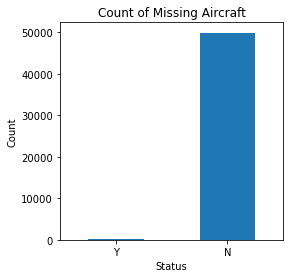

In [36]:
plt.figure(figsize=(4,4))
ntsb08['acft_missing'].value_counts().sort_values().plot(kind='bar')
plt.title('Count of Missing Aircraft')
plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['acft_missing'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['acft_missing'].isna().sum()/ntsb08.shape[0]*100)

In [37]:
ntsb08[ntsb08['acft_missing'].isnull()]

,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,cert_max_gr_wt,...,crew_age,crew_sex,crew_res_state,med_certf,med_crtf_vldty,date_lst_med,seatbelts_used,crew_tox_perf,seat_occ_pic,total_hours
1550,NaN,091,IFR,Y,SUBS,NONE,NONE,Mooney,M20C,2575.0,...,39.0,M,NY,CL3,VWW,2000-12-12 00:00:00,Y,N,LEFT,765.0
1553,NaN,091,NONE,NaN,SUBS,NONE,NaN,Schleicher,AS-K13,NaN,...,57.0,M,MI,NONE,NaN,NaN,Y,NaN,NaN,181.0
1557,NaN,091,IFR,Y,DEST,NONE,NONE,Cessna,210N,3800.0,...,31.0,M,FL,CL1,VWW,2004-07-01 00:00:00,Y,Y,LEFT,NaN
1565,NaN,091,NONE,N,SUBS,NONE,NONE,Piper,PA-28R-200,2600.0,...,28.0,M,MI,CL1,VNOW,2001-04-06 00:00:00,Y,N,RGT,1876.0
1566,NaN,091,NONE,N,SUBS,NONE,NONE,Piper,PA-28R-200,2600.0,...,39.0,M,MI,CL3,VNOW,1999-05-21 00:00:00,Y,N,LEFT,1876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66425,NaN,091,IFR,Y,DEST,GRD,GRD,Cirrus Design Corp.,SR22,3400.0,...,57.0,M,GA,CL1,NaN,2004-04-01 00:00:00,Y,Y,LEFT,483.0
66430,NaN,091,NONE,N,DEST,BOTH,IFLT,Jorgensen,Velocity XL-RG,2800.0,...,66.0,M,FL,CL3,WWL,2002-10-01 00:00:00,U,N,LEFT,614.0
66431,NaN,091,IFR,Y,SUBS,NONE,NONE,Beech,400,15780.0,...,41.0,M,GA,CL1,VWW,2002-03-26 00:00:00,Y,N,LEFT,12410.0
66432,NaN,091,IFR,Y,SUBS,NONE,NONE,Beech,400,15780.0,...,53.0,M,GA,CL2,VWW,2002-01-24 00:00:00,Y,N,RGT,12410.0


**Comment:** There are 10,796 null rows in the Aircraft Missing column, which accounts for 24% of the data in this feature. Looking at the ntsb08 dataframe where the 'acft_missing' column is null, there is additional information indicative the aircraft in that event were not missing. In addition, a preponderance of the values in the 'acft_missing' column is 'N' for not missing. There can be a reasonable certainty that 'N' can be imputed in the null rows. 

In [38]:
#Impute `acft_missing` nulls with not missing ('N')
ntsb08['acft_missing'] = ntsb08['acft_missing'].fillna('N')
#Verify there are no remaining null rows
ntsb08['acft_missing'].isnull().sum()

0

##### FAR Part | `far_part`
The authority and regulation the aircraft was operating under at the time of the accident

In [39]:
ntsb08['far_part'].unique()

array(['135 ', '121 ', '091 ', '137 ', 'NUSN', '133 ', 'NUSC', 'PUBU',
       '129 ', '125 ', '103 ', nan, '091F', 'UNK ', 'ARMF', '091K'],
      dtype=object)

In [40]:
ntsb08['far_part'] = np.where(ntsb08['far_part'] == 'UNK ', 'UNK', ntsb08['far_part'])

In [41]:
ntsb08['far_part'].unique()

array(['135 ', '121 ', '091 ', '137 ', 'NUSN', '133 ', 'NUSC', 'PUBU',
       '129 ', '125 ', '103 ', nan, '091F', 'UNK', 'ARMF', '091K'],
      dtype=object)

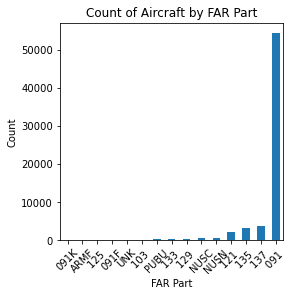

Percent Unknown: 0.10535504650672767


In [42]:
plt.figure(figsize=(4,4)) 
ntsb08['far_part'].value_counts().sort_values().plot(kind='bar')
plt.title('Count of Aircraft by FAR Part')
plt.xlabel('FAR Part')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

ntsb08['far_part'].isna().sum()/ntsb08.shape[0]*100
#Find percentage of unknowns within the column
print('Percent Unknown:', ntsb08['far_part'].str.count('UNK').sum()/ntsb08.shape[0]*100)

**Comment:** Since nulls account for only 0.06% of the data and 'UNK' account for 0.08% of the data both nulls and 'UNK' rows will be filled with 091.

In [43]:
#Impute `far_part` nulls with unknown ('UNK')
ntsb08['far_part'] = ntsb08['far_part'].fillna('091')
#Impute `far_part` UNK with unknown ('091')
ntsb08['far_part'] = np.where(ntsb08['far_part'] == 'UNK', '091', ntsb08['far_part'] )
#Impute `far_part` UNK with unknown ('091')
ntsb08['far_part'] = np.where(ntsb08['far_part'] == '091 ', '091', ntsb08['far_part'] )
#Verify there are no remaining nulls in the column
ntsb08['far_part'].isnull().sum()

0

In [44]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['flt_plan_filed', 'flight_plan_activated', 'acft_fire', 'acft_expl',
       'acft_make', 'acft_model', 'cert_max_gr_wt', 'acft_category',
       'homebuilt', 'total_seats', 'num_eng', 'elt_install', 'elt_oper',
       'elt_aided_loc_ev', 'certs_held', 'type_fly', 'second_pilot',
       'dprt_state', 'dprt_country', 'dest_state', 'dest_country',
       'phase_flt_spec', 'rwy_num', 'site_seeing', 'air_medical', 'ev_time',
       'ev_tmzn', 'ev_state', 'ev_country', 'mid_air', 'on_ground_collision',
       'ev_nr_apt_loc', 'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil',
       'vis_sm', 'wx_temp', 'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic',
       'crew_category', 'crew_age', 'crew_sex', 'crew_res_state', 'med_certf',
       'med_crtf_vldty', 'date_lst_med', 'seatbelts_used', 'crew_tox_perf',
       'seat_occ_pic', 'total_hours'],
      dtype='object')

##### Flight Plan Filed | `flight_plan_filed`
Indicates the type of flight plan filed with air traffic control (ATC).

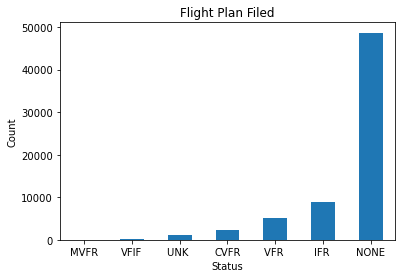

Total Rows w/ Nulls: 369
Percent Nulls: 0.5553716022997501
Percent Unknown: 1.5758104813220553


In [45]:
plt.figure()
ntsb08['flt_plan_filed'].value_counts().sort_values().plot(kind='bar')
plt.title('Flight Plan Filed')
plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['flt_plan_filed'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['flt_plan_filed'].isna().sum()/ntsb08.shape[0]*100)
print('Percent Unknown:', ntsb08['flt_plan_filed'].str.count('UNK').sum()/ntsb08.shape[0]*100)

**Comment:** From the bar graph, the category 'None' is the most common value. Since the nulls only comprise of 0.55% of the data in the column, the 'None' value will be imputed into these rows. 

In [46]:
#Impute `flt_plan_filed` nulls and 'UNK' with 'NONE'
ntsb08['flt_plan_filed'] = ntsb08['flt_plan_filed'].fillna('NONE')
ntsb08['flt_plan_filed'] = np.where(ntsb08['flt_plan_filed'] == 'UNK','NONE', ntsb08['flt_plan_filed'])
ntsb08['flt_plan_filed'] = np.where(ntsb08['flt_plan_filed'] == 'UNK ','NONE', ntsb08['flt_plan_filed'])
ntsb08['flt_plan_filed'].isnull().sum()

0

##### Flight Plan Activated | `flight_plan_activated`
Indicates if a filed flight plan was activated

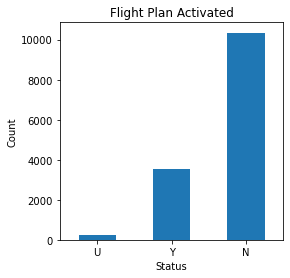

Total Rows w/ Nulls: 52324
Percent Nulls: 78.751392191686


In [47]:
plt.figure(figsize=(4,4))
ntsb08['flight_plan_activated'].value_counts().sort_values().plot(kind='bar')
plt.title('Flight Plan Activated')
plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['flight_plan_activated'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['flight_plan_activated'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Almost 80% of the rows are null. In this instance, the nulls will be imputed with 'N' or no because if a flight plan was not filed then a flight plan would not be activated. 

In [48]:
#Impute `flight_plan_activated` with 'N'
ntsb08['flight_plan_activated'] = ntsb08['flight_plan_activated'].fillna('N')
ntsb08['flight_plan_activated'].isnull().sum()

0

##### Aircraft Fire | `acft_fire`
Indicates if there was a fire 

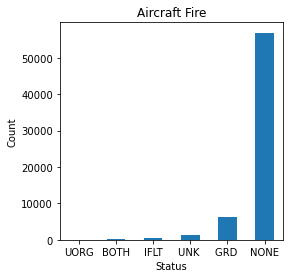

Total Rows w/ Nulls: 1401
Percent Nulls: 2.1086060022275066


In [49]:
plt.figure(figsize=(4,4))
ntsb08['acft_fire'].value_counts().sort_values().plot(kind='bar')
plt.title('Aircraft Fire')
plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['acft_fire'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['acft_fire'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** While it is more than likely the rows with null values could be imputed with 'NONE' or no fire on the ground or in-flight, there is also the option for 'Unknown' which, is less definitive and better encapsulates the uncertainty of whether or not there was a fire. 

In [50]:
#Impute `acft_fire` with 'UNK'
ntsb08['acft_fire'] = ntsb08['acft_fire'].fillna('UNK')
ntsb08['acft_fire'].isnull().sum()

0

In [51]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['acft_expl', 'acft_make', 'acft_model', 'cert_max_gr_wt',
       'acft_category', 'homebuilt', 'total_seats', 'num_eng', 'elt_install',
       'elt_oper', 'elt_aided_loc_ev', 'certs_held', 'type_fly',
       'second_pilot', 'dprt_state', 'dprt_country', 'dest_state',
       'dest_country', 'phase_flt_spec', 'rwy_num', 'site_seeing',
       'air_medical', 'ev_time', 'ev_tmzn', 'ev_state', 'ev_country',
       'mid_air', 'on_ground_collision', 'ev_nr_apt_loc', 'light_cond',
       'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp',
       'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic', 'crew_category',
       'crew_age', 'crew_sex', 'crew_res_state', 'med_certf', 'med_crtf_vldty',
       'date_lst_med', 'seatbelts_used', 'crew_tox_perf', 'seat_occ_pic',
       'total_hours'],
      dtype='object')

##### Aircraft  Explosion | `acft_expl`
Indicates if an explosion occured

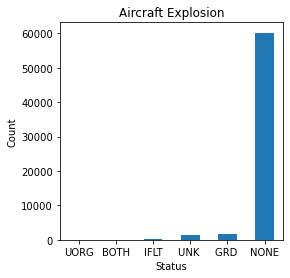

Total Rows w/ Nulls: 2905
Percent Nulls: 4.372234430029199


In [52]:
plt.figure(figsize=(4,4))
ntsb08['acft_expl'].value_counts().sort_values().plot(kind='bar')
plt.title('Aircraft Explosion')
plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['acft_expl'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['acft_expl'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** It is unlikely an aircraft exploded or was damaged by an explosion. A majority of accidents do not involve explosions, so 'NONE' will be imputed for null values. 

In [53]:
#Impute `acft_expl` with 'UNK'
ntsb08['acft_expl'] = ntsb08['acft_expl'].fillna('UNK')
ntsb08['acft_expl'].isnull().sum()

0

##### Aircraft  Make | `acft_make`
Name of aircraft manufacturer

In [54]:
acft_make = ntsb08['acft_make'].value_counts().sort_values(ascending=False)
print(acft_make)

CESSNA                            13665
PIPER                              7428
Cessna                             4558
Cessna                             3430
Piper                              2425
                                  ...  
Morgan, Marvin R.                     1
HERINK H R/HERINK R W                 1
DONALD R. CASPER                      1
Williams Helicopter                   1
Bair Helicopters, Inc.                1
Name: acft_make, Length: 5485, dtype: int64


In [55]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['acft_make'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['acft_make'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 15
Percent Nulls: 0.022576081394298786


**Comment:** There are only 15 rows with nulls, which equates to 0.02% of the data. Most of the aircraft are Cessnas, so 'Cessna' will be imputed into the nulls. 

In [56]:
#Impute `acft_expl` with 'UNK'
ntsb08['acft_make'] = ntsb08['acft_make'].fillna('CESSNA')
ntsb08['acft_make'].isnull().sum()

0

##### Aircraft  Model | `acft_model`
Alphanumeric aircraft model code

In [57]:
acft_model = ntsb08['acft_model'].value_counts().sort_values(ascending=False)
print(acft_model)

152                     1885
172                      884
172N                     775
PA-28-140                664
150                      607
                        ... 
Savage                     1
AERONCA TL                 1
M-18A DROMADIER            1
DC-8-63                    1
PA-32 300C                 1
Name: acft_model, Length: 10598, dtype: int64


In [58]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['acft_model'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['acft_model'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 17
Percent Nulls: 0.02558622558020529


**Comment:** Nulls are 0.026% of the data in the Aircraft Model feature and the 152 is the most prevalent aircraft model. The 152 model falls under the Cessna make, which is inline with values imputed into the Aircraft Make feature. 152 will be imputed for the null values in this feature.  

In [59]:
#Impute `acft_expl` with 'UNK'
ntsb08['acft_model'] = ntsb08['acft_model'].fillna('152')
ntsb08['acft_model'].isnull().sum()

0

##### Certified Max Gross Weight | `cert_max_gr_wt`
The certified maximum gross weight for the aircraft (based on weight and balance)

In [60]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['cert_max_gr_wt'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['cert_max_gr_wt'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 5246
Percent Nulls: 7.895608199632763


**Comment:** From attempting to change the column data type to 'float' results in an error that there is a error converting a string value ('HELI'). The row containing 'HELI' is located in the below cell and then dropped from the dataframe. Data cleaning can proceed from there. 

In [61]:
ntsb08.loc[ntsb08['cert_max_gr_wt'] == 'HELI']

,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,cert_max_gr_wt,...,crew_age,crew_sex,crew_res_state,med_certf,med_crtf_vldty,date_lst_med,seatbelts_used,crew_tox_perf,seat_occ_pic,total_hours
10511,N,091,NONE,N,SUBS,NONE,NONE,"THOMSEN, HORST","ROTORWAY EXEC"" """,HELI,...,M,QUILCENE,NaN,NV,1989-08-22 00:00:00,N,U,LEFT,UNK,NaN


In [62]:
#Drop the row using df.loc
ntsb08 = ntsb08.drop(ntsb08[ntsb08['cert_max_gr_wt'] == 'HELI'].index, axis=0)

In [63]:
#Convert the data type to a float
ntsb08['cert_max_gr_wt'] = ntsb08['cert_max_gr_wt'].astype(float)

In [64]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['cert_max_gr_wt'].median())
print('Mean:', ntsb08['cert_max_gr_wt'].mean())
print('Mode:', ntsb08['cert_max_gr_wt'].mode())
print('Max:', ntsb08['cert_max_gr_wt'].max())

Median: 2550.0
Mean: 12133.856687637879
Mode: 0    1600.0
Name: cert_max_gr_wt, dtype: float64
Max: 2133000.0


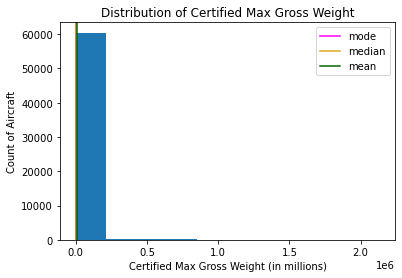

In [65]:
# VISUALIZATION of the distribution of last contact
plt.figure()
plt.hist(ntsb08['cert_max_gr_wt'])
plt.title('Distribution of Certified Max Gross Weight')
# Add the mode
plt.axvline(ntsb08['cert_max_gr_wt'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['cert_max_gr_wt'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['cert_max_gr_wt'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Certified Max Gross Weight (in millions)')
plt.ylabel('Count of Aircraft')
plt.show()

**Comment:** The graph shows a vast majority of the aircraft are below a certified max gross weight of about 250,000 pounds (lbs). However the mode, median, and mean are substantially lower. Mean is heavily influenced by outliers, so either the mode or median should be used to impute the nulls. 

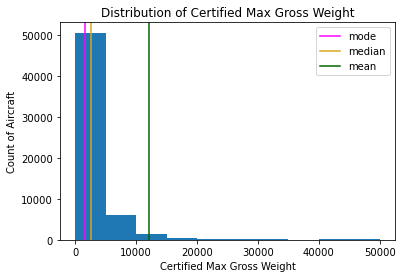

In [66]:
plt.figure()
plt.hist(ntsb08['cert_max_gr_wt'], range=[0, 50000])
plt.title('Distribution of Certified Max Gross Weight')
# Add the mode
plt.axvline(ntsb08['cert_max_gr_wt'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['cert_max_gr_wt'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['cert_max_gr_wt'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Certified Max Gross Weight')
plt.ylabel('Count of Aircraft')
plt.show()

**Comment:** Taking a closer look at the distribution, the median appears to best represent the middle values and will be used to impute the nulls. 

In [67]:
#Impute 
ntsb08['cert_max_gr_wt'] = ntsb08['cert_max_gr_wt'].fillna('2550')
#Verify no remaining nulls
ntsb08['cert_max_gr_wt'].isnull().sum()

0

##### Aircraft Category | `acft_category`
Category of aircraft as defined by the Federal Aviation Regulations (FAR)

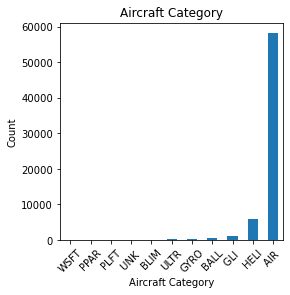

Total Rows w/ Nulls: 8
Percent Nulls: 0.012040757965713942


In [68]:
plt.figure(figsize=(4,4))
ntsb08['acft_category'].value_counts().sort_values().plot(kind='bar')
plt.title('Aircraft Category')
plt.xlabel('Aircraft Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['acft_category'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['acft_category'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** The vast majority of values in the Aircraft Category feature is airplanes. There are only eight null rows and will be imputed with the mode 'AIR'. 

In [69]:
#Impute 
ntsb08['acft_category'] = ntsb08['acft_category'].fillna('AIR')
#Verify no remaining nulls
ntsb08['acft_category'].isnull().sum()

0

##### Homebuilt | `homebuilt`
Indicates if an aircraft was homebuilt

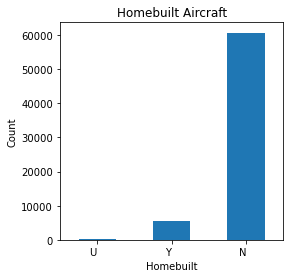

Total Rows w/ Nulls: 1
Percent Nulls: 0.0015050947457142427


In [70]:
plt.figure(figsize=(4,4))
ntsb08['homebuilt'].value_counts().sort_values().plot(kind='bar')
plt.title('Homebuilt Aircraft')
plt.xlabel('Homebuilt')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['homebuilt'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['homebuilt'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** There is one null and will be imputed with the value 'N' for not home built. 

In [71]:
#Impute 
ntsb08['homebuilt'] = ntsb08['homebuilt'].fillna('N')
#Verfiy there are no nulls 
ntsb08['homebuilt'].isnull().sum()

0

##### Total Seats | `total_seats`
Total number of seats an aircraft was configured for

In [72]:
print('Median:', ntsb08['total_seats'].median())
print('Mean:', ntsb08['total_seats'].mean())
print('Mode:', ntsb08['total_seats'].mode())
print('Max:', ntsb08['total_seats'].max())

Median: 4.0
Mean: 8.383800188256679
Mode: 0    4.0
Name: total_seats, dtype: float64
Max: 5370.0


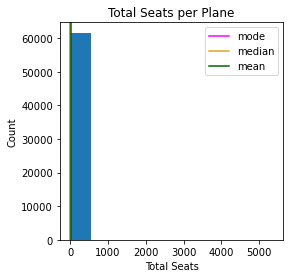

Total Rows w/ Nulls: 4823
Percent Nulls: 7.259071958579792


In [73]:
#Visualize the data column, to decide what standarized value should be used for missing data. 
plt.figure(figsize=(4, 4))
plt.hist(ntsb08['total_seats'])
#Add mode
plt.axvline(ntsb08['total_seats'].mode()[0], color='magenta', label='mode')
#Add median
plt.axvline(ntsb08['total_seats'].median(), color='goldenrod', label='median')
#Add mean
plt.axvline(ntsb08['total_seats'].mean(), color='darkgreen', label='mean')
#plot and label my graph
plt.legend()
plt.title('Total Seats per Plane')
plt.xlabel('Total Seats')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['total_seats'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['total_seats'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** From the histogram, most aricraft in this dataset have between 0 and 50 seats. The median number of seats is 4 and the mode is also 4 seats. Since mean is easily influenced by large outliers, the median and mode will be used to impute values for the nulls. 

In [74]:
#Impute 
ntsb08['total_seats'] = ntsb08['total_seats'].fillna(ntsb08['total_seats'].median())
#Verify there no remaining nulls
ntsb08['total_seats'].isnull().sum()

0

##### Number of Engines | `num_engines`
Total number of engines on the aircraft involved in the accident

In [75]:
print('Median:', ntsb08['num_eng'].median())
print('Mean:', ntsb08['num_eng'].mean())
print('Mode:', ntsb08['num_eng'].mode())
print('Max:', ntsb08['num_eng'].max())

Median: 1.0
Mean: 1.1646044656596426
Mode: 0    1.0
Name: num_eng, dtype: float64
Max: 4.0


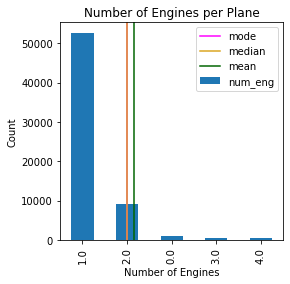

Total Rows w/ Nulls: 2755
Percent Nulls: 4.146536024442739


In [76]:
plt.figure(figsize=(4, 4))
ntsb08['num_eng'].value_counts().sort_values(ascending=False).plot(kind='bar')
#Add mode
plt.axvline(ntsb08['num_eng'].mode()[0], color='magenta', label='mode')
#Add median
plt.axvline(ntsb08['num_eng'].median(), color='goldenrod', label='median')
#Add mean
plt.axvline(ntsb08['num_eng'].mean(), color='darkgreen', label='mean')
#plot and label my graph
plt.legend()
plt.title('Number of Engines per Plane')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['num_eng'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['num_eng'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Aircraft with one engine are most common and will be used to impute the nulls. 

In [77]:
#Impute
ntsb08['num_eng'] = ntsb08['num_eng'].fillna(ntsb08['num_eng'].median())
#Verify no remaining nulls
ntsb08['num_eng'].isnull().sum()

0

##### ELT Installed |  `elt_install`
Indicates if the aircraft was installed with an Emergency Locator Transmitter (ELT) - FAR 91.207 dictates which US-registered aircraft are exempt from this requirement

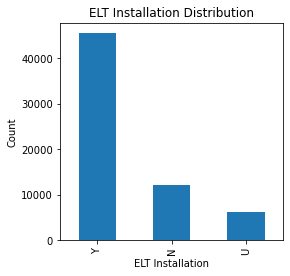

Total Rows w/ Nulls: 2626
Percent Nulls: 3.9523788022456015


In [78]:
plt.figure(figsize=(4, 4))
ntsb08['elt_install'].value_counts().plot(kind='bar')

#plot and label my graph

plt.title('ELT Installation Distribution')
plt.xlabel('ELT Installation')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['elt_install'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['elt_install'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Impute nulls with 'U' for unknown

In [79]:
#Impute unknown for the null values
ntsb08['elt_install'] = ntsb08['elt_install'].fillna('U')
#Verify no remaining nulls
ntsb08['elt_install'].isnull().sum()

0

##### ELT Operational | `elt_oper`
If an ELT was installed, indicates if the ELT activated on impact

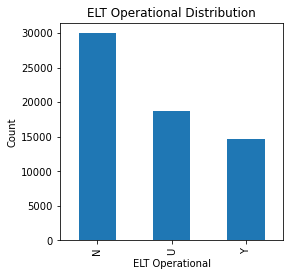

Total Rows w/ Nulls: 3072
Percent Nulls: 4.623651058834153


In [80]:
plt.figure(figsize=(4, 4))
ntsb08['elt_oper'].value_counts().plot(kind='bar')

#plot and label my graph

plt.title('ELT Operational Distribution')
plt.xlabel('ELT Operational')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['elt_oper'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['elt_oper'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Impute nulls with 'U' for unknown

In [81]:
#Impute unknown for the null values
ntsb08['elt_oper'] = ntsb08['elt_oper'].fillna('U')
#Verify no remaining nulls
ntsb08['elt_oper'].isnull().sum()

0

##### ELT Aided Locating Event | `elt_aided_loc_ev`
If an installed ELT was activated, indicates if it was used to locate the event site

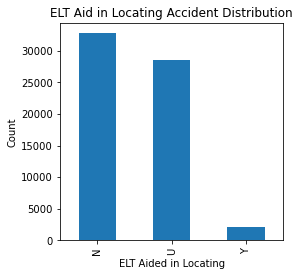

Total Rows w/ Nulls: 2926
Percent Nulls: 4.403907225959874


In [82]:
plt.figure(figsize=(4, 4))
ntsb08['elt_aided_loc_ev'].value_counts().plot(kind='bar')

#plot and label my graph

plt.title('ELT Aid in Locating Accident Distribution')
plt.xlabel('ELT Aided in Locating')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['elt_aided_loc_ev'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['elt_aided_loc_ev'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Impute nulls with unknown ('U')

In [83]:
#Impute unknown for the null values
ntsb08['elt_aided_loc_ev'] = ntsb08['elt_aided_loc_ev'].fillna('U')
#Verify there are no remaining nulls
ntsb08['elt_aided_loc_ev'].isnull().sum()

0

##### Certification Held | `certs_held`
Indicates the operator's highest operating certificate

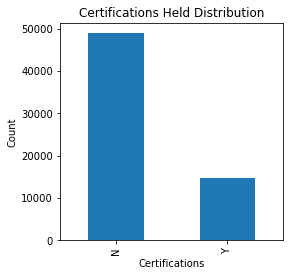

Total Rows w/ Nulls: 2893
Percent Nulls: 4.354239099351305


In [84]:
plt.figure(figsize=(4, 4))
ntsb08['certs_held'].value_counts().plot(kind='bar')

#plot and label my graph

plt.title('Certifications Held Distribution')
plt.xlabel('Certifications')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['certs_held'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['certs_held'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** For this feature the assumption for the nulls either certifications were not required for that rating or it could not be determined if certifications were held. With these assumptions, these nulls will be considered as no certifications were held ('N').

In [85]:
#Impute no for the null values
ntsb08['certs_held'] = ntsb08['certs_held'].fillna('N')
#Verify there are no remaining nulls
ntsb08['certs_held'].isnull().sum()

0

In [86]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['type_fly', 'second_pilot', 'dprt_state', 'dprt_country', 'dest_state',
       'dest_country', 'phase_flt_spec', 'rwy_num', 'site_seeing',
       'air_medical', 'ev_time', 'ev_tmzn', 'ev_state', 'ev_country',
       'mid_air', 'on_ground_collision', 'ev_nr_apt_loc', 'light_cond',
       'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp',
       'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic', 'crew_category',
       'crew_age', 'crew_sex', 'crew_res_state', 'med_certf', 'med_crtf_vldty',
       'date_lst_med', 'seatbelts_used', 'crew_tox_perf', 'seat_occ_pic',
       'total_hours'],
      dtype='object')

##### Purpose of Flight | `type_fly`
If an aircraft was operating a specific FAR Part, what was the primary purpose of flight

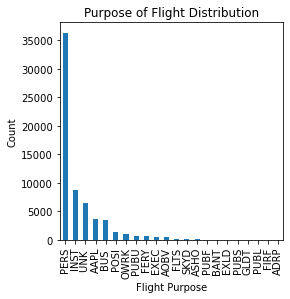

Total Rows w/ Nulls: 2402
Percent Nulls: 3.615237579205611


In [87]:
plt.figure(figsize=(4, 4))
ntsb08['type_fly'].value_counts().plot(kind='bar')

#plot and label my graph

plt.title('Purpose of Flight Distribution')
plt.xlabel('Flight Purpose')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['type_fly'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['type_fly'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** With only 3.6% of the column rows contain nulls, they will be imputed with the dominant category 'PERS'.

In [88]:
#Impute no for the null values
ntsb08['type_fly'] = ntsb08['type_fly'].fillna('PERS')
ntsb08['type_fly'].isnull().sum()

0

##### Second Pilot | `second_pilot`
Indicates presence of a co-pilot

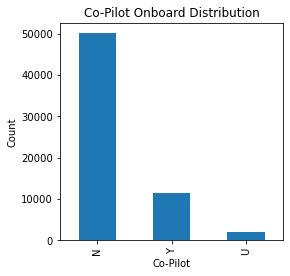

Total Rows w/ Nulls: 2989
Percent Nulls: 4.498728194939872


In [89]:
plt.figure(figsize=(4, 4))
ntsb08['second_pilot'].value_counts().plot(kind='bar')

#plot and label my graph

plt.title('Co-Pilot Onboard Distribution')
plt.xlabel('Co-Pilot')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['second_pilot'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['second_pilot'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** 4.5% of the column data including nulls, the nulls will be imputed with unknown.

In [90]:
#Impute no for the null values
ntsb08['second_pilot'] = ntsb08['second_pilot'].fillna('U')
#Verify there are no remaining nulls
ntsb08['second_pilot'].isnull().sum()

0

##### Departure Country | `dprt_country`
Country aircraft departed from immediately prior to event

In [91]:
ntsb08['dprt_country'].value_counts().sort_values(ascending=False)

       49517
USA    15298
CA        92
MX        90
AS        51
       ...  
RO         1
AA         1
AO         1
AJ         1
AM         1
Name: dprt_country, Length: 122, dtype: int64

In [92]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['dprt_country'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['dprt_country'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 440
Percent Nulls: 0.6622416881142669


**Comment:** The USA accounts for a majority of the category values and will be imputed into the nulls. 

In [93]:
#Impute
ntsb08['dprt_country'] = ntsb08['dprt_country'].fillna('USA')
#Verify there are no remaining nulls
ntsb08['dprt_country'].isnull().sum()

0

In [94]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['dprt_state', 'dest_state', 'dest_country', 'phase_flt_spec', 'rwy_num',
       'site_seeing', 'air_medical', 'ev_time', 'ev_tmzn', 'ev_state',
       'ev_country', 'mid_air', 'on_ground_collision', 'ev_nr_apt_loc',
       'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp',
       'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic', 'crew_category',
       'crew_age', 'crew_sex', 'crew_res_state', 'med_certf', 'med_crtf_vldty',
       'date_lst_med', 'seatbelts_used', 'crew_tox_perf', 'seat_occ_pic',
       'total_hours'],
      dtype='object')

##### Departure State | `dprt_state`
State aircraft departed from immediately prior to event

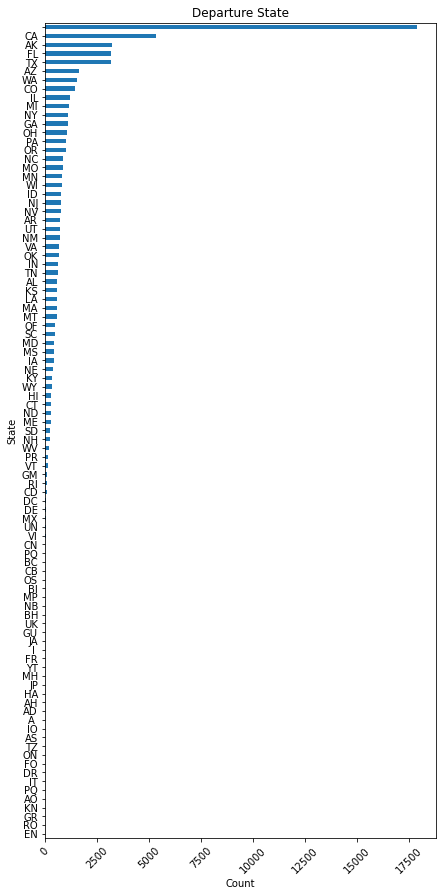

In [95]:
plt.figure(figsize=(7, 15))
ntsb08['dprt_state'].value_counts().sort_values().plot(kind='barh')
plt.title('Departure State')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.ylabel('State')
plt.show()

In [96]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['dprt_state'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['dprt_state'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 1583
Percent Nulls: 2.382564982465646


**Comment:** Impute nulls with an unknown ('UN'). 

In [97]:
#Impute no for the null values
ntsb08['dprt_state'] = ntsb08['dprt_state'].fillna('UN')
#Verify there are no nulls remaining
ntsb08['dprt_state'].isnull().sum()

0

In [98]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['dest_state', 'dest_country', 'phase_flt_spec', 'rwy_num',
       'site_seeing', 'air_medical', 'ev_time', 'ev_tmzn', 'ev_state',
       'ev_country', 'mid_air', 'on_ground_collision', 'ev_nr_apt_loc',
       'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp',
       'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic', 'crew_category',
       'crew_age', 'crew_sex', 'crew_res_state', 'med_certf', 'med_crtf_vldty',
       'date_lst_med', 'seatbelts_used', 'crew_tox_perf', 'seat_occ_pic',
       'total_hours'],
      dtype='object')

##### Destination Country | `dest_country`
Intended destination country of aircraft

In [99]:
ntsb08['dest_country'].value_counts().sort_values(ascending=False)

       49517
USA    10907
CA        83
MX        74
FR        50
       ...  
HU         1
RE         1
JM         1
EZ         1
KN         1
Name: dest_country, Length: 122, dtype: int64

In [100]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['dest_country'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['dest_country'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 5021
Percent Nulls: 7.557080718231212


**Comment:** The USA accounts for a majority of the category values and will be imputed into the nulls. 

In [101]:
#Impute
ntsb08['dest_country'] = ntsb08['dest_country'].fillna('USA')
#Verify there are no remaining nulls
ntsb08['dest_country'].isnull().sum()

0

In [102]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['dest_state', 'phase_flt_spec', 'rwy_num', 'site_seeing', 'air_medical',
       'ev_time', 'ev_tmzn', 'ev_state', 'ev_country', 'mid_air',
       'on_ground_collision', 'ev_nr_apt_loc', 'light_cond',
       'sky_cond_nonceil', 'sky_cond_ceil', 'vis_sm', 'wx_temp',
       'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic', 'crew_category',
       'crew_age', 'crew_sex', 'crew_res_state', 'med_certf', 'med_crtf_vldty',
       'date_lst_med', 'seatbelts_used', 'crew_tox_perf', 'seat_occ_pic',
       'total_hours'],
      dtype='object')

##### Destination State | `dest_state`
Intended destination state of aircraft

In [103]:
ntsb08['dest_state'].value_counts().sort_values(ascending=False)

      28852
CA     3587
AK     2243
FL     2172
TX     2101
      ...  
FO        1
IT        1
SW        1
42        1
CM        1
Name: dest_state, Length: 116, dtype: int64

In [104]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['dest_state'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['dest_state'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 6055
Percent Nulls: 9.113348685299739


**Comment:** California accounts for a majority of the category values and will be imputed into the nulls. 

In [105]:
#Impute
ntsb08['dest_state'] = ntsb08['dest_state'].fillna('CA')
#Verify there are no remaining nulls
ntsb08['dest_state'].isnull().sum()

0

##### Specific Phase of Flight | `phase_flt_spec`
Phase of flight event occured in

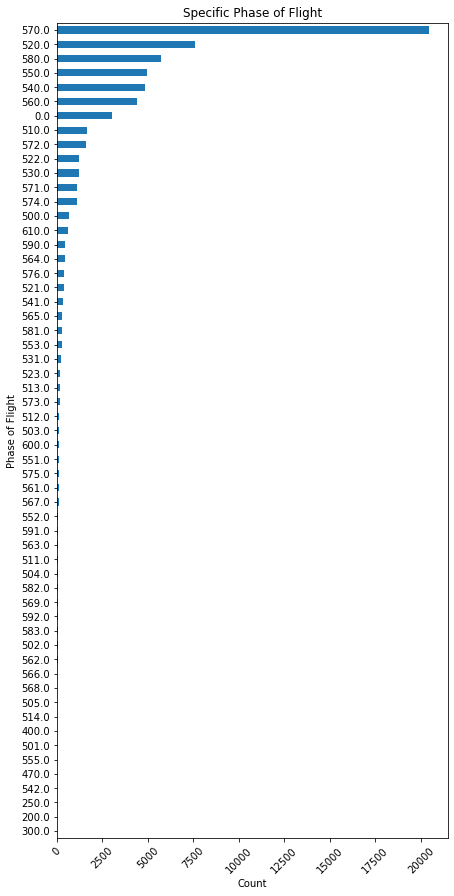

In [106]:
plt.figure(figsize=(7, 15))
ntsb08['phase_flt_spec'].value_counts().sort_values().plot(kind='barh')
plt.title('Specific Phase of Flight')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.ylabel('Phase of Flight')
plt.show()

In [107]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['phase_flt_spec'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['phase_flt_spec'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 1273
Percent Nulls: 1.915985611294231


**Comment:** Phase 570, or landing, is where most aviation accidents take place followed by code which equates to the take off phase. For nulls, code 570 will be imputed. 

In [108]:
#Impute
ntsb08['phase_flt_spec'] = ntsb08['phase_flt_spec'].fillna('570')
#Verify there are no remaining nulls
ntsb08['phase_flt_spec'].isnull().sum()

0

In [109]:
#Check columns with nulls to determine next feature for null evaluation
ntsb08.columns[ntsb08.isnull().any()]

Index(['rwy_num', 'site_seeing', 'air_medical', 'ev_time', 'ev_tmzn',
       'ev_state', 'ev_country', 'mid_air', 'on_ground_collision',
       'ev_nr_apt_loc', 'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil',
       'vis_sm', 'wx_temp', 'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic',
       'crew_category', 'crew_age', 'crew_sex', 'crew_res_state', 'med_certf',
       'med_crtf_vldty', 'date_lst_med', 'seatbelts_used', 'crew_tox_perf',
       'seat_occ_pic', 'total_hours'],
      dtype='object')

##### Site Seeing | `site_seeing`
Indicates if the flight was for site seeing; not covered in the `type_flight` feature

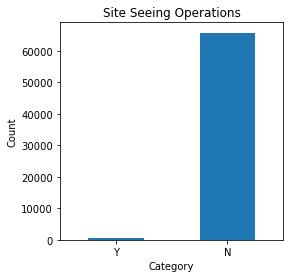

Total Rows w/ Nulls: 191
Percent Nulls: 0.2874730964314203


In [110]:
#shorten x-axis range to view where majority of runway lengths
plt.figure(figsize=(4, 4))
ntsb08['site_seeing'].value_counts().sort_values().plot(kind='bar')
plt.title('Site Seeing Operations')
plt.xlabel('Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['site_seeing'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['site_seeing'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** ONly 0.29% of the values are null and an overwhelming number of the events are not site seeing operations. Site Seeing nulls will be imputed as not site seeing operation s('N').

In [111]:
#Impute
ntsb08['site_seeing'] = ntsb08['site_seeing'].fillna('N')
#Verify there are no remaining nulls
ntsb08['site_seeing'].isnull().sum()

0

##### Medical Flight | `air_medical`
Indicates if the flight was for site seeing; not covered in the `type_flight` feature - medical flights often fall under different FAR parts of operation during different phases of the flight (e.g. when a patient is onboard or not). 

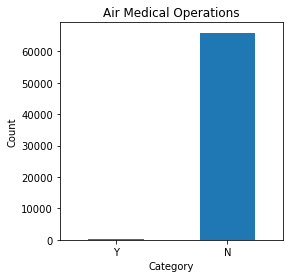

Total Rows w/ Nulls: 166
Percent Nulls: 0.2498457277885643


In [112]:
#shorten x-axis range to view where majority of runway lengths
plt.figure(figsize=(4, 4))
ntsb08['air_medical'].value_counts().sort_values().plot(kind='bar')
plt.title('Air Medical Operations')
plt.xlabel('Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()


#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['air_medical'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['air_medical'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Null values are about 0.25% of the column data and most of the rows indicate most events were not air medical operations. Nulls will be imputed as not air medical operations ('N').

In [113]:
#Impute
ntsb08['air_medical'] = ntsb08['air_medical'].fillna('N')
#Verify there are no remaining nulls
ntsb08['air_medical'].isnull().sum()

0

<a id='ev-null'></a>
#### Event Information Features
##### Event Time | `ev_time`
Time of day the event occured - military format (i.e. 1430)

In [114]:
ntsb08['ev_time'] = ntsb08['ev_time'].astype(float)

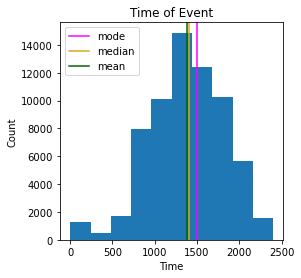

Total Rows w/ Nulls: 148
Percent Nulls: 0.2227540223657079


In [115]:
#shorten x-axis range to view where majority of runway lengths
plt.figure(figsize=(4, 4))

plt.axvline(ntsb08['ev_time'].mode()[0], color='magenta', label='mode')
#Add median
plt.axvline(ntsb08['ev_time'].median(), color='goldenrod', label='median')
#Add mean
plt.axvline(ntsb08['ev_time'].mean(), color='darkgreen', label='mean')
#plot and label my graph
plt.legend()

ntsb08['ev_time'].plot(kind='hist')
plt.title('Time of Event')
plt.xlabel('Time')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()


#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['ev_time'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['ev_time'].isna().sum()/ntsb08.shape[0]*100)

In [116]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['ev_time'].median())
print('Mean:', ntsb08['ev_time'].mean())
print('Mode:', ntsb08['ev_time'].mode())
print('Max:', ntsb08['ev_time'].max())

Median: 1400.0
Mean: 1377.88858552185
Mode: 0    1500.0
Name: ev_time, dtype: float64
Max: 2400.0


**Comment:** Less than 1% of the data is null and will be imputed with the median

In [117]:
#Impute 
ntsb08['ev_time'] = ntsb08['ev_time'].fillna(ntsb08['ev_time'].median())
#Verify there are no remaining nulls
ntsb08['ev_time'].isnull().sum()

0

#### Event Time Zone | `ev_tmzn`
Time zone the event occured in

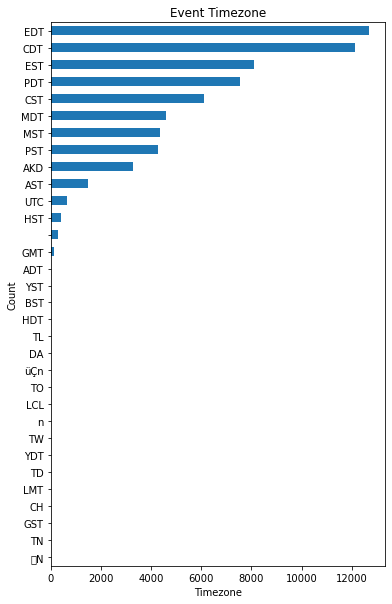

Total Rows w/ Nulls: 350
Percent Nulls: 0.526783160999985


In [118]:
plt.figure(figsize=(6, 10))
ntsb08['ev_tmzn'].value_counts().sort_values().plot(kind='barh')
plt.title('Event Timezone')
plt.xlabel('Timezone')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['ev_tmzn'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['ev_tmzn'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Looking at the time and time zone, there are multiple timezone the events are occurring in. Ideally the times would all be standardized, in this case UTC since events and departures are occuring in different states and countries. There are different ways this could be tackled, but it is possible a model is able to derive a use for the data as is. The nulls in the time feature will be dropped and the nulls in the timezone feature will be imputed with EDT. 

In [119]:
#Impute EDT
ntsb08['ev_tmzn'] = ntsb08['ev_tmzn'].fillna('EDT')
#Verify there are no remaining nulls
ntsb08['ev_tmzn'].isnull().sum()

0

##### Event Country | `ev_country`
Event the country occured in

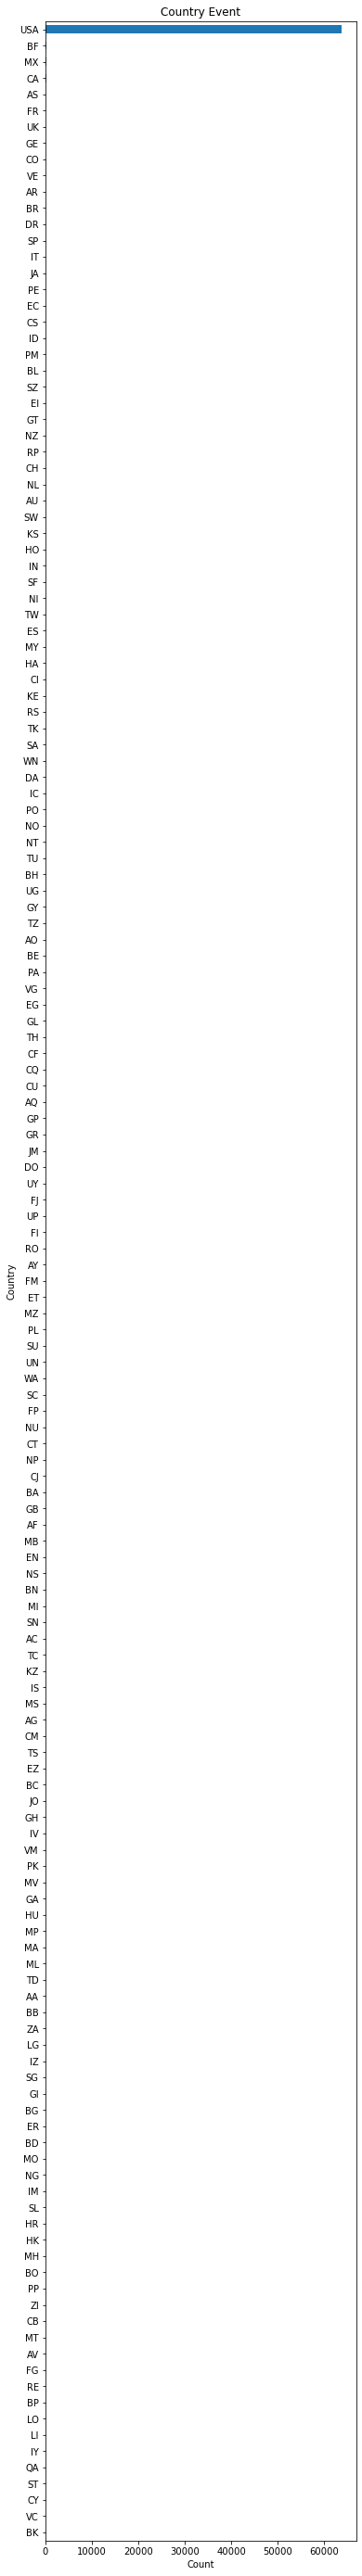

In [120]:
plt.figure(figsize=(6, 50))
ntsb08['ev_country'].value_counts().sort_values().plot(kind='barh')
plt.title('Country Event')
plt.xlabel('Count')
plt.xticks(rotation='horizontal')
plt.ylabel('Country')
plt.show()

**Comment:** The scope of this project is to focus on only accidents that occur in the US. The nulls will first be imputed with US and then rows with other countries will be dropped. 

In [121]:
#Impute USA
ntsb08['ev_country'] = ntsb08['ev_country'].fillna('USA')
#Verify there are no remaining nulls
ntsb08['ev_country'].isnull().sum()

0

In [122]:
#Find all rows where the event country is not USA
ntsb08.loc[ntsb08['ev_country'] != 'USA']

,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,cert_max_gr_wt,...,crew_age,crew_sex,crew_res_state,med_certf,med_crtf_vldty,date_lst_med,seatbelts_used,crew_tox_perf,seat_occ_pic,total_hours
298,N,NUSN,NONE,N,DEST,GRD,NONE,Mil,MI-8MTV-1,28660.0,...,49.0,M,,CL1,VNOW,1998-07-23 00:00:00,Y,N,LEFT,11800.0
404,N,NUSC,IFR,N,DEST,NONE,NONE,Boeing,737-400,150000.0,...,46.0,M,NaN,UNK,UNK,NaN,NaN,NaN,UNK,17503.0
405,N,NUSC,IFR,N,DEST,NONE,NONE,Boeing,737-400,150000.0,...,53.0,M,NaN,UNK,NaN,NaN,NaN,NaN,UNK,17503.0
458,N,121,VFIF,N,SUBS,NONE,NONE,de Havilland,DHC-6-200,11579.0,...,42.0,M,AS,CL1,VWW,1998-12-30 00:00:00,Y,N,LEFT,6449.0
880,N,PUBU,VFR,N,SUBS,NONE,NONE,GRUMMAN,G21A,9200.0,...,51.0,M,AK,CL2,VWW,1993-05-13 00:00:00,Y,N,LEFT,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66324,N,NUSC,IFR,Y,NONE,UNK,UNK,Airbus Industrie,A300-600,2550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66358,N,121,IFR,N,NONE,UNK,UNK,BOEING,747-100,0.0,...,NaN,U,,UNK,UNK,NaN,U,U,UNK,NaN
66371,N,NUSN,NONE,N,DEST,UNK,UNK,Beech,65-90,2550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66395,N,NUSN,NONE,N,DEST,UNK,UNK,Cessna,TU206G,2550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#Drop the rows using df.loc
ntsb08 = ntsb08.drop(ntsb08[ntsb08['ev_country'] != 'USA'].index, axis=0)

In [124]:
#Drop event country column since the same value is in all the rows
ntsb08 = ntsb08.drop(['ev_country'], axis=1)
ntsb08.columns[ntsb08.isnull().any()]

Index(['rwy_num', 'ev_state', 'mid_air', 'on_ground_collision',
       'ev_nr_apt_loc', 'light_cond', 'sky_cond_nonceil', 'sky_cond_ceil',
       'vis_sm', 'wx_temp', 'wind_dir_deg', 'wind_vel_kts', 'wx_cond_basic',
       'crew_category', 'crew_age', 'crew_sex', 'crew_res_state', 'med_certf',
       'med_crtf_vldty', 'date_lst_med', 'seatbelts_used', 'crew_tox_perf',
       'seat_occ_pic', 'total_hours'],
      dtype='object')

##### Event State | `ev_state`
State the event occured in

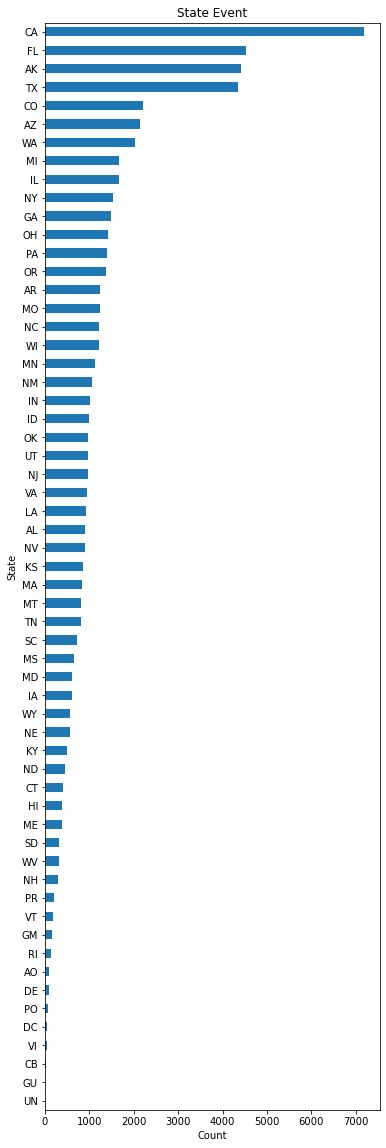

Total Rows w/ Nulls: 40
Percent Nulls: 0.06231306081754736


In [125]:
plt.figure(figsize=(6, 20))
ntsb08['ev_state'].value_counts().sort_values().plot(kind='barh')
plt.title('State Event')
plt.xlabel('Count')
plt.xticks(rotation='horizontal')
plt.ylabel('State')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['ev_state'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['ev_state'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** California is the state where most events take place and will be used to impute the null values. 

In [126]:
#Impute EDT
ntsb08['ev_state'] = ntsb08['ev_state'].fillna('CA')
#Verify there are no remaining nulls
ntsb08['ev_state'].isnull().sum()

0

##### Mid-Air Collision | `mid_air`
Indicates if a collision occcured in the air

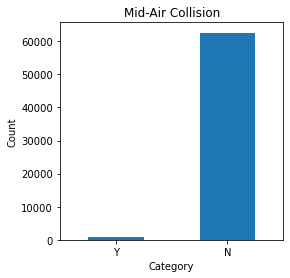

Total Rows w/ Nulls: 692
Percent Nulls: 1.0780159521435693


In [127]:
plt.figure(figsize=(4,4))
ntsb08['mid_air'].value_counts().sort_values().plot(kind='bar')
plt.title('Mid-Air Collision')
plt.xlabel('Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['mid_air'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['mid_air'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Most of the events do not involve a mid-air collision, therefore the nulls will be imputed with 'N'.

In [128]:
#Impute nulls
ntsb08['mid_air'] = ntsb08['mid_air'].fillna('N')
#Verify there are no remaining nulls
ntsb08['mid_air'].isnull().sum()

0

##### On Ground Collision | `on_ground_collision`
Indicates if there was a collion that occured on the ground

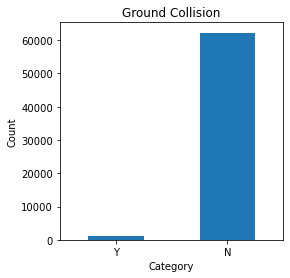

Total Rows w/ Nulls: 692
Percent Nulls: 1.0780159521435693


In [129]:
plt.figure(figsize=(4,4))
ntsb08['on_ground_collision'].value_counts().sort_values().plot(kind='bar')
plt.title('Ground Collision')
plt.xlabel('Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['on_ground_collision'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['on_ground_collision'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Most of the events do not involve a ground collision, therefore the nulls will be imputed with 'N'.

In [130]:
#Impute nulls
ntsb08['on_ground_collision'] = ntsb08['on_ground_collision'].fillna('N')
#Verify there are no remaining nulls
ntsb08['on_ground_collision'].isnull().sum()

0

##### Nearest Airport to the Event | `ev_nr_apt_loc`
This features indicates whether the accident happened on or off an airport

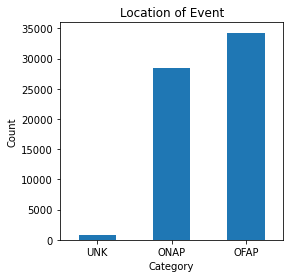

Total Rows w/ Nulls: 754
Percent Nulls: 1.1746011964107677


In [131]:
plt.figure(figsize=(4,4))
ntsb08['ev_nr_apt_loc'].value_counts().sort_values().plot(kind='bar')
plt.title('Location of Event')
plt.xlabel('Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['ev_nr_apt_loc'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['ev_nr_apt_loc'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** 1.2% of the column data is null; these rows will be imputed with 'UNK'

In [132]:
#Impute nulls
ntsb08['ev_nr_apt_loc'] = ntsb08['ev_nr_apt_loc'].fillna('UNK')
#Verify there are no remaining nulls
ntsb08['ev_nr_apt_loc'].isnull().sum()

0

<a id='wx-null'></a>
#### Weather Information Features
##### Light Condition | `light_cond`
Indicates the category of the light condition at the time of the event

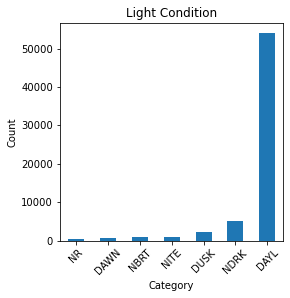

Total Rows w/ Nulls: 242
Percent Nulls: 0.3769940179461615


In [133]:
plt.figure(figsize=(4, 4))
ntsb08['light_cond'].value_counts().sort_values().plot(kind='bar')

plt.title('Light Condition')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['light_cond'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['light_cond'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Most of the values for the light conditions occur during daylight. The null values, which are less than 0.5% of the data will imputed with 'DAYL'.

In [134]:
#Impute nulls
ntsb08['light_cond'] = ntsb08['light_cond'].fillna('DAYL')
#Verify there are no remaining nulls
ntsb08['light_cond'].isnull().sum()

0

##### Sky Condition - Ceiling  | `sky_cond_ceil`
The type of cloud coverage that best describes the cloud ceiling at the time of the accident. A ceiling is defined as any cloud layer of greater than 4/8 coverage.

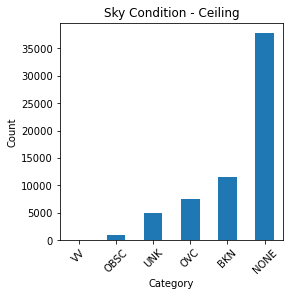

Total Rows w/ Nulls: 1482
Percent Nulls: 2.3086989032901295


In [135]:
plt.figure(figsize=(4, 4))
ntsb08['sky_cond_ceil'].value_counts().sort_values().plot(kind='bar')

plt.title('Sky Condition - Ceiling')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['sky_cond_ceil'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['sky_cond_ceil'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** In most events, there is no ceiling so 'NONE' will be imputed into the null values. 

In [136]:
#Impute nulls
ntsb08['sky_cond_ceil'] = ntsb08['sky_cond_ceil'].fillna('NONE')
#Verify there are no remaining nulls
ntsb08['sky_cond_ceil'].isnull().sum()

0

##### Sky Condition - Non-Ceiling | `sky_cond_nonceil`
The cloud condition (non-ceiling) type present at the time of the event. Indicate the cloud condition (non-ceiling) type present at the time of the event. A non-ceiling is defined as any cloud layer of 4/8 or less coverage, including any cloud layer reported as "few," "scattered," or includes classifications of "thin" or "partial."

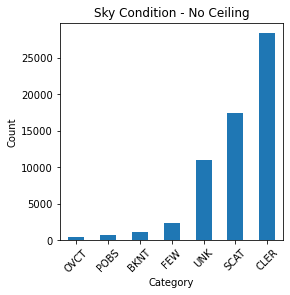

Total Rows w/ Nulls: 2707
Percent Nulls: 4.217036390827517


In [137]:
plt.figure(figsize=(4, 4))
ntsb08['sky_cond_nonceil'].value_counts().sort_values().plot(kind='bar')

plt.title('Sky Condition - No Ceiling')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['sky_cond_nonceil'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['sky_cond_nonceil'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** When there is no ceiling, the sky condition most often seen is clear. The null values will be imputed with 'CLEAR'.

In [138]:
#Impute nulls
ntsb08['sky_cond_nonceil'] = ntsb08['sky_cond_ceil'].fillna('CLEAR')
#Verify there are no remaining nulls
ntsb08['sky_cond_nonceil'].isnull().sum()

0

In [139]:
print('Columns w/ Nulls:', ntsb08.columns[ntsb08.isnull().any()])
print('Number of Remaining Columns:', len(ntsb08.columns[ntsb08.isnull().any()]))

Columns w/ Nulls: Index(['rwy_num', 'vis_sm', 'wx_temp', 'wind_dir_deg', 'wind_vel_kts',
       'wx_cond_basic', 'crew_category', 'crew_age', 'crew_sex',
       'crew_res_state', 'med_certf', 'med_crtf_vldty', 'date_lst_med',
       'seatbelts_used', 'crew_tox_perf', 'seat_occ_pic', 'total_hours'],
      dtype='object')
Number of Remaining Columns: 17


##### Visibility in Statute Miles (sm) | `vis_sm`
The visibility, either in-flight or ground visibility as appropriate, at the time of the event

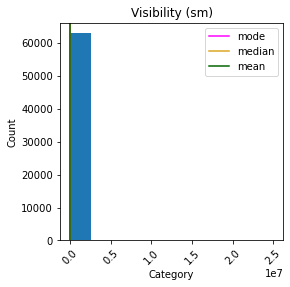

Total Rows w/ Nulls: 1166
Percent Nulls: 1.8164257228315055


In [140]:
plt.figure(figsize=(4, 4))

# Add the mode
plt.axvline(ntsb08['vis_sm'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['vis_sm'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['vis_sm'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['vis_sm'].plot(kind='hist')

plt.title('Visibility (sm)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['vis_sm'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['vis_sm'].isna().sum()/ntsb08.shape[0]*100)

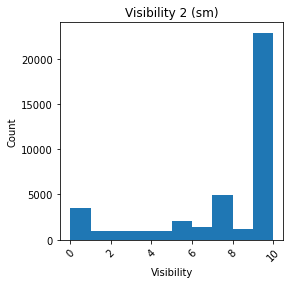

Total Rows w/ Nulls: 1166
Percent Nulls: 1.8164257228315055


In [141]:
plt.figure(figsize=(4, 4))
ntsb08['vis_sm'].plot(kind='hist', range = [0,10])

plt.title('Visibility 2 (sm)')
plt.xlabel('Visibility')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['vis_sm'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['vis_sm'].isna().sum()/ntsb08.shape[0]*100)

In [142]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['vis_sm'].median())
print('Mean:', ntsb08['vis_sm'].mean())
print('Mode:', ntsb08['vis_sm'].mode())
print('Max:', ntsb08['vis_sm'].max())

Median: 10.0
Mean: 1524.4100579126077
Mode: 0    10.0
Name: vis_sm, dtype: float64
Max: 25000000.0


**Comment:** All US weather observations provide a maximum value of 10 statue miles the means that any value about 10 is more than likely in the wrong unit or the value was entered incorrectly. There do not appear to be too many values. Although this will enter bias, the values over 10 and nulls will be imputed with the median which is 10 sm. 

In [143]:
ntsb08['vis_sm'] = np.where(ntsb08['vis_sm'] > 10, 10, ntsb08['vis_sm'])

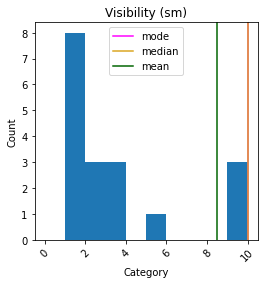

In [144]:
plt.figure(figsize=(4, 4))
# Add the mode
plt.axvline(ntsb08['vis_sm'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['vis_sm'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['vis_sm'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['vis_sm'].value_counts().sort_values().plot(kind='hist', range = [0,10])

plt.title('Visibility (sm)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [145]:
#Impute nulls
ntsb08['vis_sm'] = ntsb08['vis_sm'].fillna(10)
#Verify there are no remaining nulls
ntsb08['vis_sm'].isnull().sum()

0

##### Temperature | `wx_temp`
The reported ambient air temperature at the time of the event, typically reported in degrees Celsius

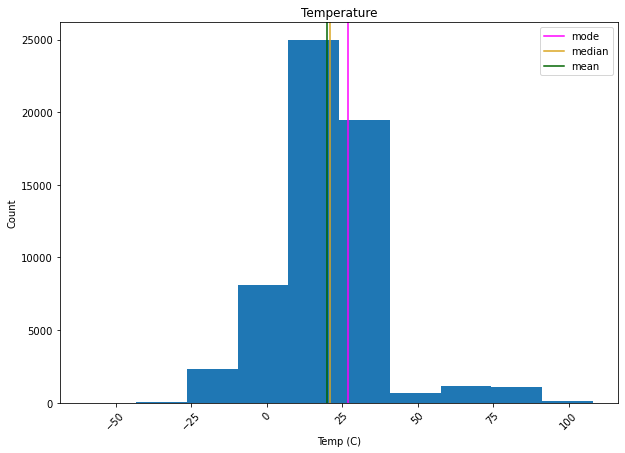

In [146]:
plt.figure(figsize=(10, 7))
# Add the mode
plt.axvline(ntsb08['wx_temp'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['wx_temp'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['wx_temp'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['wx_temp'].plot(kind='hist')

plt.title('Temperature')
plt.xlabel('Temp (C)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [147]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['wx_temp'].median())
print('Mean:', ntsb08['wx_temp'].mean())
print('Mode:', ntsb08['wx_temp'].mode())
print('Max:', ntsb08['wx_temp'].max())

Median: 21.0
Mean: 19.86993835368065
Mode: 0    27.0
Name: wx_temp, dtype: float64
Max: 108.0


In [148]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wx_temp'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wx_temp'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 6281
Percent Nulls: 9.784708374875374


**Comment:** 9.8% of the null values in the temperature feature is null. The nulls will be imputed with the median. 

In [149]:
#Impute nulls
ntsb08['wx_temp'] = ntsb08['wx_temp'].fillna(ntsb08['wx_temp'].median())
#Verify there are no remaining nulls
ntsb08['wx_temp'].isnull().sum()

0

##### Wind Direction (in degrees) | `wind_dir_deg`
The local indicated wind direction at the time of the event recorded as the average direction over a 2-minute period. Direction is reported in 10-degree increments with respect to true north.

In [150]:
ntsb08['wind_dir_deg'] = ntsb08['wind_dir_deg'].astype(float)

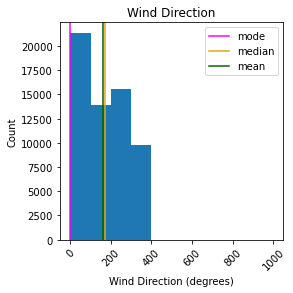

Total Rows w/ Nulls: 3535
Percent Nulls: 5.506916749750747


In [151]:
plt.figure(figsize=(4, 4))
# Add the mode
plt.axvline(ntsb08['wind_dir_deg'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['wind_dir_deg'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['wind_dir_deg'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['wind_dir_deg'].plot(kind='hist')

plt.title('Wind Direction')
plt.xlabel('Wind Direction (degrees)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wind_dir_deg'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wind_dir_deg'].isna().sum()/ntsb08.shape[0]*100)

In [152]:
ntsb08['wind_dir_deg'] = np.where(ntsb08['wind_dir_deg'] > 360, 0, ntsb08['wind_dir_deg'])

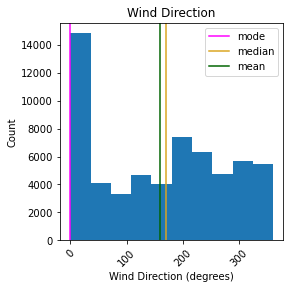

In [153]:
plt.figure(figsize=(4, 4))
# Add the mode
plt.axvline(ntsb08['wind_dir_deg'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['wind_dir_deg'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['wind_dir_deg'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['wind_dir_deg'].plot(kind='hist')

plt.title('Wind Direction')
plt.xlabel('Wind Direction (degrees)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [154]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['wind_dir_deg'].median())
print('Mean:', ntsb08['wind_dir_deg'].mean())
print('Mode:', ntsb08['wind_dir_deg'].mode())
print('Max:', ntsb08['wind_dir_deg'].max())

Median: 170.0
Mean: 158.87627149380944
Mode: 0    0.0
Name: wind_dir_deg, dtype: float64
Max: 360.0


**Comment:** Initially there are wind direction values that are greater than 360. When specific weather observation sensors are unable to determine the wind speed the value 999 is used. Any value greater than 360 was imputed with 0. From there, the mean, median, and mode were recalculated and the column re-visualized. For this feature, the median will be used. 

In [155]:
#Impute nulls
ntsb08['wind_dir_deg'] = ntsb08['wind_dir_deg'].fillna(ntsb08['wind_dir_deg'].median())
#Verify there are no remaining nulls
ntsb08['wind_dir_deg'].isnull().sum()

0

##### Wind Velocity (knots -kts) | `wind_vel_kts`
The local reported wind speed at the time of the event

In [156]:
ntsb08['wind_vel_kts'] = ntsb08['wind_vel_kts'].astype(float)

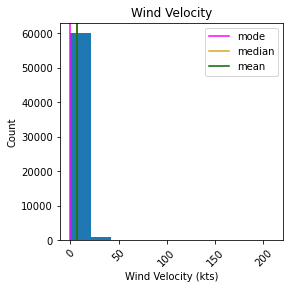

Total Rows w/ Nulls: 3039
Percent Nulls: 4.73423479561316


In [157]:
plt.figure(figsize=(4, 4))
# Add the mode
plt.axvline(ntsb08['wind_vel_kts'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['wind_vel_kts'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['wind_vel_kts'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['wind_vel_kts'].plot(kind='hist')

plt.title('Wind Velocity')
plt.xlabel('Wind Velocity (kts)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wind_vel_kts'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wind_vel_kts'].isna().sum()/ntsb08.shape[0]*100)

In [158]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['wind_vel_kts'].median())
print('Mean:', ntsb08['wind_vel_kts'].mean())
print('Mode:', ntsb08['wind_vel_kts'].mode())
print('Max:', ntsb08['wind_vel_kts'].max())

Median: 7.0
Mean: 7.211273363530816
Mode: 0    0.0
Name: wind_vel_kts, dtype: float64
Max: 210.0


**Comment:** The data for this features is 4.7% nulls and those nulls will be imputed with the median. 

In [159]:
#Impute nulls
ntsb08['wind_vel_kts'] = ntsb08['wind_vel_kts'].fillna(ntsb08['wind_vel_kts'].median())
#Verify there are no remaining nulls
ntsb08['wind_vel_kts'].isnull().sum()

0

##### Basic Weather Conditions | `wx_cond_basic`
General weather conditons at the time of the event

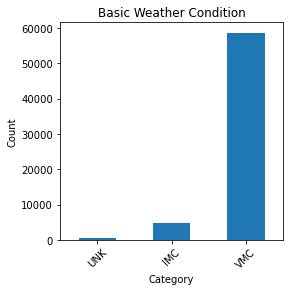

Total Rows w/ Nulls: 80
Percent Nulls: 0.12462612163509472


In [160]:
plt.figure(figsize=(4, 4))
ntsb08['wx_cond_basic'].value_counts().sort_values().plot(kind='bar')

plt.title('Basic Weather Condition')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['wx_cond_basic'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['wx_cond_basic'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** 0.12% of the data in the column is null. These rows will be imputed with 'VMC'. 

In [161]:
#Impute nulls
ntsb08['wx_cond_basic'] = ntsb08['wx_cond_basic'].fillna('VMC')
#Verify there are no remaining nulls
ntsb08['wx_cond_basic'].isnull().sum()

0

<a id='crew-null'></a>
#### Crew Information Features
##### Crew Category | `crew_category`
Category that best describes the responsibilities of the flight crew member at the time of the accident

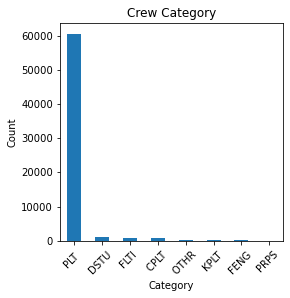

Total Rows w/ Nulls: 208
Percent Nulls: 0.3240279162512463


In [162]:
plt.figure(figsize=(4, 4))
ntsb08['crew_category'].value_counts().plot(kind='bar')

plt.title('Crew Category')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['crew_category'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['crew_category'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Most of the crew fall into the pilot category and the nulls will be imputed with 'PLT'. 

In [163]:
#Impute nulls
ntsb08['crew_category'] = ntsb08['crew_category'].fillna('PLT')
#Verify there are no remaining nulls
ntsb08['crew_category'].isnull().sum()

0

##### Crew Age | `crew_age`
Age of the flight crew member in years

In [164]:
ntsb08['crew_age'] = ntsb08['crew_age'].astype(float)

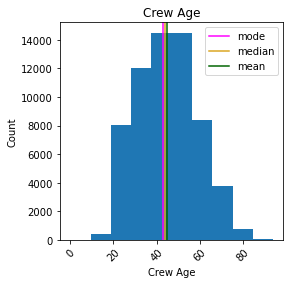

Total Rows w/ Nulls: 1723
Percent Nulls: 2.6841350947158524


In [165]:
plt.figure(figsize=(4, 4))

# Add the mode
plt.axvline(ntsb08['crew_age'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['crew_age'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['crew_age'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['crew_age'].plot(kind='hist')

plt.title('Crew Age')
plt.xlabel('Crew Age')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['crew_age'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['crew_age'].isna().sum()/ntsb08.shape[0]*100)

In [166]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['crew_age'].median())
print('Mean:', ntsb08['crew_age'].mean(), 0)
print('Mode:', ntsb08['crew_age'].mode())
print('Max:', ntsb08['crew_age'].max())

Median: 44.0
Mean: 44.67491075573484 0
Mode: 0    43.0
Name: crew_age, dtype: float64
Max: 94.0


**Comment:** 2.7% of the feature data is null and the the medain and mode are relatively close. For this feature the median will be used. 

In [167]:
#Impute nulls
ntsb08['crew_age'] = ntsb08['crew_age'].fillna(ntsb08['crew_age'].median())
#Verify there are no remaining nulls
ntsb08['crew_age'].isnull().sum()

0

##### Crew Sex | `crew_sex`
Sex of the crew member

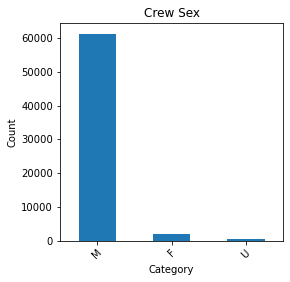

Total Rows w/ Nulls: 273
Percent Nulls: 0.4252866400797607


In [168]:
plt.figure(figsize=(4, 4))
ntsb08['crew_sex'].value_counts().plot(kind='bar')

plt.title('Crew Sex')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['crew_sex'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['crew_sex'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** A majority of the pilots are email and there is a very low number of nulls. Nulls will be imputed with 'M' for male. 

In [169]:
#Impute nulls
ntsb08['crew_sex'] = ntsb08['crew_sex'].fillna('M')
#Verify there are no remaining nulls
ntsb08['crew_sex'].isnull().sum()
# ---OR--

0

##### Crew Resident State | `crew_res_state`
Indicates state of residency for crew member

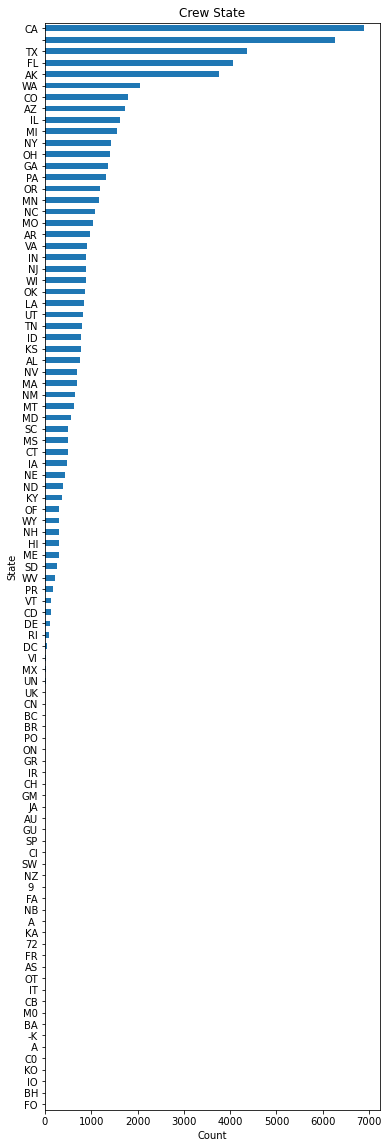

In [170]:
plt.figure(figsize=(6, 20))
ntsb08['crew_res_state'].value_counts().sort_values(ascending=True).plot(kind='barh')

plt.title('Crew State')
plt.xlabel('Count')
plt.xticks(rotation='horizontal')
plt.ylabel('State')

plt.show()

In [171]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['crew_res_state'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['crew_res_state'].isna().sum()/ntsb08.shape[0]*100)

Total Rows w/ Nulls: 772
Percent Nulls: 1.202642073778664


**Comment:** 1.5% of the feature data is null and the most common crew resident state is California and will be used to impute nulls. 

In [172]:
#Impute nulls
ntsb08['crew_res_state'] = ntsb08['crew_res_state'].fillna('CA')
#Verify there are no remaining nulls
ntsb08['crew_res_state'].isnull().sum()

0

##### Medical Ceriftication | `med_certf`
The class of medical certificate held by the crew member at the time of the event. Refer to 14 CFR 61.23 for questions pertaining to medical certificate requirements and duration.

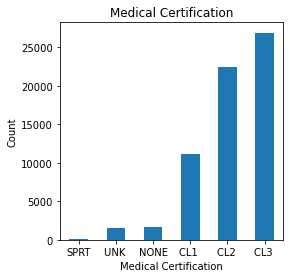

Total Rows w/ Nulls: 470
Percent Nulls: 0.7321784646061815


In [173]:
plt.figure(figsize=(4, 4))
ntsb08['med_certf'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Medical Certification')
plt.xlabel('Medical Certification')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['med_certf'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['med_certf'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Less than 1% of the feature data is null and the majority of medical classifications are Class 3. Class 3 will be used to impute the nulls. 

In [174]:
#Impute nulls
ntsb08['med_certf'] = ntsb08['med_certf'].fillna('CL3')
#Verify there are no remaining nulls
ntsb08['med_certf'].isnull().sum()

0

##### Valid Medical Certification | `med_crtf_vldty`
The validity of the medical certificate (and waivers) held by the crew member at the time of the event

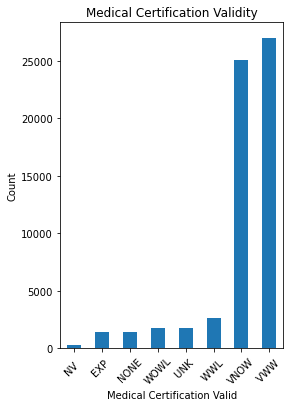

Total Rows w/ Nulls: 2776
Percent Nulls: 4.3245264207377865


In [175]:
plt.figure(figsize=(4, 6))
ntsb08['med_crtf_vldty'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Medical Certification Validity')
plt.xlabel('Medical Certification Valid')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['med_crtf_vldty'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['med_crtf_vldty'].isna().sum()/ntsb08.shape[0]*100)

**Comment:** Just under 5% of the feature data is null. Comparing the categories, there are multiple values that are the same with different codes. VWW is a valid medical certificate with wiavers or limitations and WWL is with waivers/limitations. Before a decision is made on how to impute the nulls the following category values will be joined:
- VWW and WWL >> VWW
- VNOW and WOWL >> VNOW

In [176]:
#Find all unqiue category values 
ntsb08.med_crtf_vldty.unique()

array(['VWW ', 'VNOW', 'NONE', 'WWL ', 'EXP ', 'UNK ', 'NV  ', nan,
       'WOWL'], dtype=object)

In [177]:
ntsb08['med_crtf_vldty'] = np.where(ntsb08['med_crtf_vldty'] == 'WWL', 'VWW', ntsb08['med_crtf_vldty'])

In [178]:
ntsb08['med_crtf_vldty'] = np.where(ntsb08['med_crtf_vldty'] == 'WWL ', 'VWW', ntsb08['med_crtf_vldty'])

In [179]:
ntsb08['med_crtf_vldty'] = np.where(ntsb08['med_crtf_vldty'] == 'VWW ', 'VWW', ntsb08['med_crtf_vldty'])

In [180]:
ntsb08['med_crtf_vldty'] = np.where(ntsb08['med_crtf_vldty'] == 'WOWL', 'VNOW', ntsb08['med_crtf_vldty'])

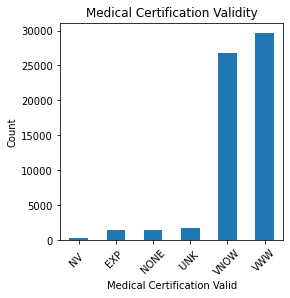

In [181]:
plt.figure(figsize=(4, 4))
ntsb08['med_crtf_vldty'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Medical Certification Validity')
plt.xlabel('Medical Certification Valid')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

**Comment:** Overall, pilots involved in an investigated aviation event held valid medical certifications. There appears to be slightly more pilots with 'VWW' medical certificates and that will be used to impute nulls.

In [182]:
#Impute nulls
ntsb08['med_crtf_vldty'] = ntsb08['med_crtf_vldty'].fillna('VWW')
#Verify there are no remaining nulls
ntsb08['med_crtf_vldty'].isnull().sum()

0

##### Seatbelts Used | `seatbelts_used`
Indicates if the crew were wearing seatbelts when the event occured

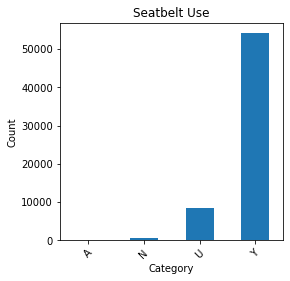

Total Rows w/ Nulls: 944
Percent Nulls: 1.4705882352941175


In [183]:
plt.figure(figsize=(4, 4))
ntsb08['seatbelts_used'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Seatbelt Use')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['seatbelts_used'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['seatbelts_used'].isna().sum()/ntsb08.shape[0]*100)


**Comment:** Most crew appear to use seatbelts in the aircraft. The nulls will be imputed with 'Y' to indicate seatbelt use. 

In [184]:
#Impute nulls
ntsb08['seatbelts_used'] = ntsb08['seatbelts_used'].fillna('Y')
#Verify there are no remaining nulls
ntsb08['seatbelts_used'].isnull().sum()

0

##### Crew Toxicology Performed | `crew_tox_perf`
Indicates if a toxicology report was perfomed on crew members

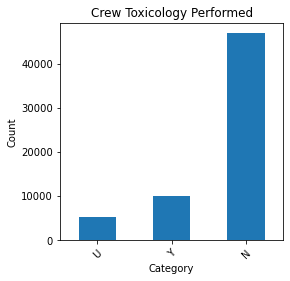

Total Rows w/ Nulls: 1987
Percent Nulls: 3.0954012961116653


In [185]:
plt.figure(figsize=(4, 4))
ntsb08['crew_tox_perf'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('Crew Toxicology Performed')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['crew_tox_perf'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['crew_tox_perf'].isna().sum()/ntsb08.shape[0]*100)


**Comment:** A majority of the time a crew toxicology was not performed, the 3.4% nulls will be imputed with 'N'. 

In [186]:
#Impute nulls
ntsb08['crew_tox_perf'] = ntsb08['crew_tox_perf'].fillna('N')
#Verify there are no remaining nulls
ntsb08['crew_tox_perf'].isnull().sum()

0

##### Seat Occupancy of PIC | `seat_occ_pic`
Indicates where the PIC was sitting

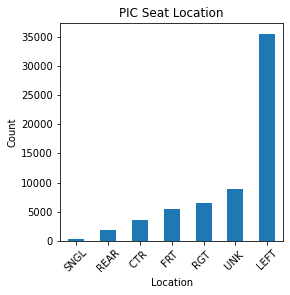

Total Rows w/ Nulls: 2059
Percent Nulls: 3.2075648055832504


In [187]:
plt.figure(figsize=(4, 4))
ntsb08['seat_occ_pic'].value_counts().sort_values(ascending=True).plot(kind='bar')

plt.title('PIC Seat Location')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['seat_occ_pic'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['seat_occ_pic'].isna().sum()/ntsb08.shape[0]*100)

In [188]:
#Impute nulls
ntsb08['seat_occ_pic'] = ntsb08['seat_occ_pic'].fillna('LEFT')
#Verify there are no remaining nulls
ntsb08['seat_occ_pic'].isnull().sum()

0

##### Crew Flight Experience | `total_hours`
The total amount of flying experience of a crew member

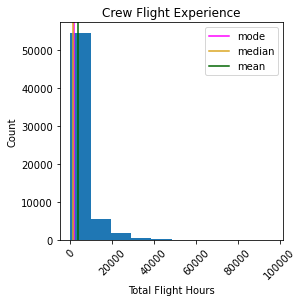

Total Rows w/ Nulls: 2134
Percent Nulls: 3.324401794616152


In [189]:
plt.figure(figsize=(4, 4))

# Add the mode
plt.axvline(ntsb08['total_hours'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['total_hours'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['total_hours'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['total_hours'].plot(kind='hist')

plt.title('Crew Flight Experience')
plt.xlabel('Total Flight Hours')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['total_hours'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['total_hours'].isna().sum()/ntsb08.shape[0]*100)

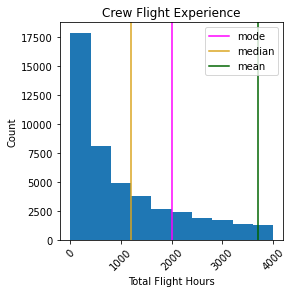

Total Rows w/ Nulls: 2134
Percent Nulls: 3.324401794616152


In [190]:
plt.figure(figsize=(4, 4))

# Add the mode
plt.axvline(ntsb08['total_hours'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['total_hours'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['total_hours'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['total_hours'].plot(kind='hist', range=[0,4000])

plt.title('Crew Flight Experience')
plt.xlabel('Total Flight Hours')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['total_hours'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['total_hours'].isna().sum()/ntsb08.shape[0]*100)

In [191]:
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['total_hours'].median())
print('Mean:', ntsb08['total_hours'].mean())
print('Mode:', ntsb08['total_hours'].mode())
print('Max:', ntsb08['total_hours'].max())

Median: 1200.0
Mean: 3697.7649779238777
Mode: 0    2000.0
Name: total_hours, dtype: float64
Max: 96845.0


**Comment:** The feature data is 3.3% nulls and a majority of the flight hours fall well below 1,000 hours of flight experience. The median best represents this data and will be used to impute the nulls. 

In [192]:
#Impute nulls
ntsb08['total_hours'] = ntsb08['total_hours'].fillna(ntsb08['total_hours'].median())
#Verify there are no remaining nulls
ntsb08['total_hours'].isnull().sum()

0

---
<a id='Step-5'></a>
## 5. Feature Engineering
---
The feature `date_lst_med` indicates the last time a medical was performed for the crew member. This is not strictly useful and is difficult to deal with the nulls. Instead a new feature was engineered to determine the duration (in days) it was since the last medical. After reviewing the initial information a new dataframe was created that subtracted the event date from the last medical date. To ensure proper formatting the resulting column was encoded as 'timedelta64'. The difference in dates (in days) was then appended to the main dataframe and revisualized. From there nulls were imputed in a similar manner to all features in this project.

In [193]:
ntsb08['date_lst_med'] = pd.to_datetime(ntsb08['date_lst_med'])

In [194]:
ntsb08['date_lst_med'].value_counts().sort_values(ascending=False)

2005-03-01    192
2005-06-01    181
2006-03-01    168
2005-05-01    165
2005-01-01    163
             ... 
1999-10-30      1
2001-09-23      1
1984-09-03      1
1991-02-17      1
2007-06-06      1
Name: date_lst_med, Length: 8221, dtype: int64

In [195]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['date_lst_med'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['date_lst_med'].isna().sum()/ntsb08.shape[0]*100)
#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['date_lst_med'].median())
print('Mean:', ntsb08['date_lst_med'].mean(), 0)
print('Mode:', ntsb08['date_lst_med'].mode())
print('Max:', ntsb08['date_lst_med'].max())

Total Rows w/ Nulls: 3965
Percent Nulls: 6.176782153539382
Median: 1992-05-08 00:00:00
Mean: 1992-11-19 08:11:19.030999424 0
Mode: 0   2005-03-01
Name: date_lst_med, dtype: datetime64[ns]
Max: 2007-12-17 00:00:00


In [196]:
ntsb08['ev_date'] = pd.to_datetime(ntsb08['ev_date'])
ntsb08['durt_ev_med'] = ntsb08['ev_date'] - ntsb08['date_lst_med']
ntsb08.head()

,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,cert_max_gr_wt,...,crew_sex,crew_res_state,med_certf,med_crtf_vldty,date_lst_med,seatbelts_used,crew_tox_perf,seat_occ_pic,total_hours,durt_ev_med
0,N,135,CVFR,N,SUBS,NONE,NONE,Cessna,207,3800.0,...,M,AK,CL2,VWW,1998-03-30,Y,N,LEFT,5350.0,286 days
1,N,121,IFR,N,MINR,GRD,NONE,Boeing,747-100,750000.0,...,M,AZ,CL1,VWW,1999-01-04,Y,N,LEFT,23000.0,15 days
2,N,135,CVFR,N,SUBS,NONE,NONE,Piper,PA-31-350,7369.0,...,M,AK,CL1,VNOW,1998-12-01,Y,N,LEFT,10000.0,35 days
3,N,091,NONE,N,SUBS,NONE,NONE,Cessna,172,2300.0,...,F,AK,CL3,VNOW,1997-10-29,Y,N,LEFT,450.0,438 days
4,N,135,CVFR,N,SUBS,NONE,NONE,Cessna,207,3800.0,...,M,AK,CL2,VNOW,1998-08-17,Y,N,LEFT,854.0,148 days


In [197]:
ntsb08['durt_ev_med'] = ntsb08['durt_ev_med'].astype('timedelta64[D]')

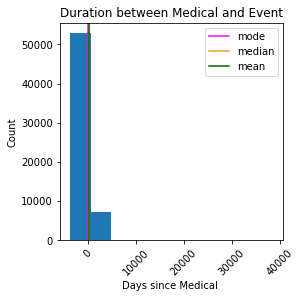

In [198]:
#Visualize
plt.figure(figsize=(4, 4))

# Add the mode
plt.axvline(ntsb08['durt_ev_med'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['durt_ev_med'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['durt_ev_med'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['durt_ev_med'].plot(kind='hist')

plt.title('Duration between Medical and Event')
plt.xlabel('Days since Medical ')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


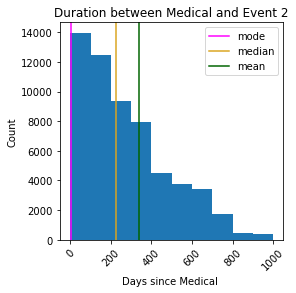

In [199]:
plt.figure(figsize=(4, 4))
# Add the mode
plt.axvline(ntsb08['durt_ev_med'].mode()[0], color='magenta', label='mode')
# Add the median
plt.axvline(ntsb08['durt_ev_med'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(ntsb08['durt_ev_med'].mean(), color='darkgreen', label='mean')
plt.legend()

ntsb08['durt_ev_med'].plot(kind='hist', range=[0,1000])

plt.title('Duration between Medical and Event 2')
plt.xlabel('Days since Medical ')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [200]:
#Find total number of rows with nulls
print('Total Rows w/ Nulls:', ntsb08['durt_ev_med'].isna().sum())
#Find percentage of nulls within the column
print('Percent Nulls:', ntsb08['durt_ev_med'].isna().sum()/ntsb08.shape[0]*100)

#Review the median, mean, mode, and max of the column
print('Median:', ntsb08['durt_ev_med'].median())
print('Mean:', ntsb08['durt_ev_med'].mean(), 0)
print('Mode:', ntsb08['durt_ev_med'].mode())
print('Max:', ntsb08['durt_ev_med'].max())

Total Rows w/ Nulls: 3965
Percent Nulls: 6.176782153539382
Median: 227.0
Mean: 337.24757998904147 0
Mode: 0      2.0
1    107.0
Name: durt_ev_med, dtype: float64
Max: 38607.0


**Comment:** 6% of the data is null and the histogram indicates a heavy skew in the data. Most of the values show most pilots and/or crew completed their last medical at least 500 days before the event. The average is 333 days so within the last year prior to the accident. The median is 223 days and will be used to impute the nulls. 

In [201]:
#Impute nulls
ntsb08['durt_ev_med'] = ntsb08['durt_ev_med'].fillna(ntsb08['durt_ev_med'].median())
#Verify there are no remaining nulls
ntsb08['durt_ev_med'].isnull().sum()

0

In [202]:
ntsb08['durt_ev_med'] = ntsb08['durt_ev_med'].astype(float)
ntsb08['durt_ev_med'].head()

0    286.0
1     15.0
2     35.0
3    438.0
4    148.0
Name: durt_ev_med, dtype: float64

**Comment:** Given the range of dates and the dependency on other information, like the time of the event it does not make as much sense to create a generic date for each null row. Instead a feature, `durt_ev_med_days`, will be generated based on the duration of days between the date of the last medical and the date of the event. Then either the median or mode will be imputed for the null values. 

In [203]:
ntsb08.head()

,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,cert_max_gr_wt,...,crew_sex,crew_res_state,med_certf,med_crtf_vldty,date_lst_med,seatbelts_used,crew_tox_perf,seat_occ_pic,total_hours,durt_ev_med
0,N,135,CVFR,N,SUBS,NONE,NONE,Cessna,207,3800.0,...,M,AK,CL2,VWW,1998-03-30,Y,N,LEFT,5350.0,286.0
1,N,121,IFR,N,MINR,GRD,NONE,Boeing,747-100,750000.0,...,M,AZ,CL1,VWW,1999-01-04,Y,N,LEFT,23000.0,15.0
2,N,135,CVFR,N,SUBS,NONE,NONE,Piper,PA-31-350,7369.0,...,M,AK,CL1,VNOW,1998-12-01,Y,N,LEFT,10000.0,35.0
3,N,091,NONE,N,SUBS,NONE,NONE,Cessna,172,2300.0,...,F,AK,CL3,VNOW,1997-10-29,Y,N,LEFT,450.0,438.0
4,N,135,CVFR,N,SUBS,NONE,NONE,Cessna,207,3800.0,...,M,AK,CL2,VNOW,1998-08-17,Y,N,LEFT,854.0,148.0


**Comment:** After verifying there are no nulls and the feature was added, the `date_lst_med` features can be dropped.

In [204]:
ntsb08 = ntsb08.drop(['date_lst_med'], axis=1)

Final check to ensure there are no features with nulls

In [205]:
print('Columns w/ Nulls:', ntsb08.columns[ntsb08.isnull().any()])
print('Number of Remaining Columns:', len(ntsb08.columns[ntsb08.isnull().any()]))

Columns w/ Nulls: Index(['rwy_num'], dtype='object')
Number of Remaining Columns: 1


---
<a id='Step-6'></a>
## 6. Summary
---
In this first phase of cleaning, duplicate, unknown, and null values were examined to further feature selection. One feature was created to better understand the impact of the original feature, date of last medical. There are no remaining null values in the dataset and the number of feature was successfully reduced from 137 to 64 while simultaneously retaining a majority of the rows (66,442 to 64,192).

In [206]:
ntsb08.head()

,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,cert_max_gr_wt,...,crew_age,crew_sex,crew_res_state,med_certf,med_crtf_vldty,seatbelts_used,crew_tox_perf,seat_occ_pic,total_hours,durt_ev_med
0,N,135,CVFR,N,SUBS,NONE,NONE,Cessna,207,3800.0,...,42.0,M,AK,CL2,VWW,Y,N,LEFT,5350.0,286.0
1,N,121,IFR,N,MINR,GRD,NONE,Boeing,747-100,750000.0,...,53.0,M,AZ,CL1,VWW,Y,N,LEFT,23000.0,15.0
2,N,135,CVFR,N,SUBS,NONE,NONE,Piper,PA-31-350,7369.0,...,39.0,M,AK,CL1,VNOW,Y,N,LEFT,10000.0,35.0
3,N,091,NONE,N,SUBS,NONE,NONE,Cessna,172,2300.0,...,25.0,F,AK,CL3,VNOW,Y,N,LEFT,450.0,438.0
4,N,135,CVFR,N,SUBS,NONE,NONE,Cessna,207,3800.0,...,38.0,M,AK,CL2,VNOW,Y,N,LEFT,854.0,148.0


In [207]:
ntsb08.shape

(64192, 64)

### Export the cleaned data as a CSV file
**Note:** Remove hashtag and rerun the cell to export the file

In [208]:
#ntsb08.to_csv('data/ntsb08_clean.csv')

---
#### <div align = "right">Up Next:</div>
<div align = "right">Aviation Accident Capstone Part II: Model Selection & Evaluation</div>